- 해당 코드 돌리기 전에 비디오 다이콤 > avi형태로 변환 > png 파일로 변환 완료후 실행

In [1]:
import pandas as pd
import re

In [2]:
org_df = '/data2/hoon2/LUS_Dataset/csv_files/original_labeling_sheet_20240216.xlsx'

In [3]:
v1_df = pd.read_csv('/data2/hoon2/LUS_Dataset/csv_files/version1_v1.csv', index_col=0)
v2_df = pd.read_csv('/data2/hoon2/LUS_Dataset/csv_files/version2_v1.csv', index_col=0)

print(len(v1_df))
print(len(v2_df))

388
388


In [4]:
v1_df['A-line'] = v1_df['A-line'].map(lambda x: x if pd.isna(x) else x.strip())
v1_df['A-line'] = v1_df['A-line'].replace('', pd.NA, inplace=False)

v1_df['B-line'] = v1_df['B-line'].map(lambda x: x if pd.isna(x) else x.strip())
v1_df['B-line'] = v1_df['B-line'].replace('', pd.NA, inplace=False)

v1_df['Confluent B-line'] = v1_df['Confluent B-line'].map(lambda x: x if pd.isna(x) else x.strip())
v1_df['Confluent B-line'] = v1_df['Confluent B-line'].replace('', pd.NA, inplace=False)

v1_df['Consolidation'] = v1_df['Consolidation'].map(lambda x: x if pd.isna(x) else x.strip())
v1_df['Consolidation'] = v1_df['Consolidation'].replace('', pd.NA, inplace=False)

v1_df['Pleural effusion'] = v1_df['Pleural effusion'].map(lambda x: x if pd.isna(x) else x.strip())
v1_df['Pleural effusion'] = v1_df['Pleural effusion'].replace('', pd.NA, inplace=False)
####################################
v2_df['A-line'] = v2_df['A-line'].map(lambda x: x if pd.isna(x) else x.strip())
v2_df['A-line'] = v2_df['A-line'].replace('', pd.NA, inplace=False)

v2_df['B-line'] = v2_df['B-line'].map(lambda x: x if pd.isna(x) else x.strip())
v2_df['B-line'] = v2_df['B-line'].replace('', pd.NA, inplace=False)

v2_df['Confluent B-line'] = v2_df['Confluent B-line'].map(lambda x: x if pd.isna(x) else x.strip())
v2_df['Confluent B-line'] = v2_df['Confluent B-line'].replace('', pd.NA, inplace=False)

v2_df['Consolidation'] = v2_df['Consolidation'].map(lambda x: x if pd.isna(x) else x.strip())
v2_df['Consolidation'] = v2_df['Consolidation'].replace('', pd.NA, inplace=False)

v2_df['Pleural effusion'] = v2_df['Pleural effusion'].map(lambda x: x if pd.isna(x) else x.strip())
v2_df['Pleural effusion'] = v2_df['Pleural effusion'].replace('', pd.NA, inplace=False)

In [5]:
print(len(v1_df))
print(len(v2_df))

388
388


In [6]:
len(v1_df[v1_df.Data_type=='image'])
v1_df.Data_type.value_counts()

Data_type
video    349
image     39
Name: count, dtype: int64

In [7]:
len(v2_df[v2_df.Data_type=='image'])
v2_df.Data_type.value_counts()

Data_type
video    349
image     39
Name: count, dtype: int64

In [8]:
v1_df.head()

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,Lung Ultrasound Score,study_id
0,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,1,24965778_2
1,24965778,3,20230614,video,NaN,24_27,NaN,NaN,NaN,NaN,1,24965778_3
2,24965778,4,20230614,video,NaN,NaN,NaN,2_18,NaN,NaN,3_c,24965778_4
3,24965778,5,20230614,video,NaN,NaN,NaN,NaN,1_54,NaN,3_e,24965778_5
4,24965778,6,20230614,video,15_60,NaN,NaN,NaN,NaN,NaN,0,24965778_6


In [9]:
video_v1_df = v1_df[v1_df['Data_type'] != 'image']
print(len(video_v1_df))
video_v2_df = v2_df[v2_df['Data_type'] != 'image']
print(len(video_v2_df))

349
349


In [10]:
video_v1_df[video_v1_df['study_id']=='60241834_5']

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,Lung Ultrasound Score,study_id


# load png file paths

In [11]:
from tqdm import tqdm

In [12]:
from glob import glob

version1_all_png_paths = glob('/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/version_1/*/*.png')
version2_all_png_paths = glob('/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/version_2/*/*.png')

In [13]:
print(len(version1_all_png_paths))
print(len(version2_all_png_paths))

48037
48646


In [14]:
version2_all_png_paths[0]
match = re.match(r'(\d+_\d+)_\d+', version1_all_png_paths[0].split('/')[-1].split('.')[0])
match.group(1)

'49627330_00007'

In [15]:
data = []

# 이미지 case는 제외하기 위해
pattern = re.compile(r'(\d+_\d+)_\d+')

# tqdm을 사용하여 진행 상황 표시
for i in tqdm(range(len(version1_all_png_paths))):
    file_name = version1_all_png_paths[i].split('/')[-1].split('.')[0]
    study_id = pattern.match(file_name)

    if study_id:
        p1 = study_id.group(1).split('_')[0]
        p2 = int(study_id.group(1).split('_')[1])
        revised_study_id = f"{p1}_{p2}"
        data.append({
            'FileName': file_name,
            'study_id': revised_study_id
        })

version1_png_df = pd.DataFrame(data, columns=['FileName', 'study_id'])

100%|██████████| 48037/48037 [00:00<00:00, 386386.06it/s]


In [16]:
version1_png_df.head()

,FileName,study_id
0,49627330_00007_27,49627330_7
1,49627330_00005_104,49627330_5
2,49627330_00007_78,49627330_7
3,49627330_00006_61,49627330_6
4,49627330_00003_141,49627330_3


In [17]:
data2 = []

# 이미지 case는 제외하기 위해
pattern = re.compile(r'(\d+_\d+)_\d+')

for i in tqdm(range(len(version2_all_png_paths))):
    file_name = version2_all_png_paths[i].split('/')[-1].split('.')[0]
    study_id = pattern.match(file_name)
    if study_id:
        
        p1 = study_id.group(1).split('_')[0]
        p2 = int(study_id.group(1).split('_')[1])
        revised_study_id = f"{p1}_{p2}"
        
        data2.append({
            'FileName': file_name,
            'study_id': revised_study_id
        })

version2_png_df = pd.DataFrame(data2, columns=['FileName', 'study_id'])

  0%|          | 0/48646 [00:00<?, ?it/s]

100%|██████████| 48646/48646 [00:00<00:00, 286266.43it/s]


In [18]:
version2_png_df.head()

,FileName,study_id
0,49627330_00007_27,49627330_7
1,49627330_00005_104,49627330_5
2,49627330_00007_78,49627330_7
3,49627330_00006_61,49627330_6
4,49627330_00003_141,49627330_3


In [19]:
version1_png_df[version1_png_df['study_id'] == '41223316_7']

,FileName,study_id


## png csv, labeling csv merge

In [20]:
# 두 데이터프레임의 공통된 'study_id' 값 찾기
common_study_ids = set(video_v1_df['study_id']).intersection(set(version1_png_df['study_id']))

# 공통된 'study_id'만 포함하도록 각 데이터프레임 필터링
video_v1_df_filtered = video_v1_df[video_v1_df['study_id'].isin(common_study_ids)]
version1_png_df_filtered = version1_png_df[version1_png_df['study_id'].isin(common_study_ids)]

# 필터링된 데이터프레임 병합
merged_video_v1_df = pd.merge(video_v1_df_filtered, version1_png_df_filtered, on='study_id')
print(len(merged_video_v1_df))
print(f"1차 수집(version 1) 환자 수 : {len(set(merged_video_v1_df['PatientID']))}")
print(f"1차 수집(version 1) 추가된 비디오 수 : {len(set(merged_video_v1_df['study_id']))}")
print(f"1차 수집(version 1) 추가된 이미지 수 : {len(set(merged_video_v1_df['FileName']))}")

47849
1차 수집(version 1) 환자 수 : 35
1차 수집(version 1) 추가된 비디오 수 : 341
1차 수집(version 1) 추가된 이미지 수 : 47849


In [21]:
# 두 데이터프레임의 공통된 'study_id' 값 찾기
common_study_ids = set(video_v2_df['study_id']).intersection(set(version2_png_df['study_id']))

# 공통된 'study_id'만 포함하도록 각 데이터프레임 필터링
video_v2_df_filtered = video_v2_df[video_v2_df['study_id'].isin(common_study_ids)]
version2_png_df_filtered = version2_png_df[version2_png_df['study_id'].isin(common_study_ids)]

# 필터링된 데이터프레임 병합
merged_video_v2_df = pd.merge(video_v2_df_filtered, version2_png_df_filtered, on='study_id')
print(len(merged_video_v2_df))
print(f"1차 수집(version 2) 추가된 환자 수 : {len(set(merged_video_v2_df['PatientID']))}")
print(f"1차 수집(version 2) 추가된 비디오 수 : {len(set(merged_video_v2_df['study_id']))}")
print(f"1차 수집(version 2) 추가된 이미지 수 : {len(set(merged_video_v2_df['FileName']))}")

48457
1차 수집(version 2) 추가된 환자 수 : 35
1차 수집(version 2) 추가된 비디오 수 : 345
1차 수집(version 2) 추가된 이미지 수 : 48457


In [22]:
print(len(merged_video_v1_df))
print(len(merged_video_v2_df))

47849
48457


In [23]:
version1_png_df[version1_png_df['study_id'] == '41223316_7']
# video_v1_df[video_v1_df['study_id'] == '41223316_7']

,FileName,study_id


In [24]:
'''
second_v1_patient_num = merged_video_v1_df["PatientID"].isna().sum()
second_v2_patient_num = merged_video_v2_df["PatientID"].isna().sum()

print(f'version1_2차 수집에 추가된 이미지 수 : {second_v1_patient_num}')
print(f'version2_2차 수집에 추가된 이미지 수 : {second_v2_patient_num}')

merged_video_v1_df = merged_video_v1_df.dropna(subset=["PatientID"])
merged_video_v2_df = merged_video_v2_df.dropna(subset=["PatientID"])

print(len(merged_video_v1_df))
print(len(merged_video_v2_df))
'''

'\nsecond_v1_patient_num = merged_video_v1_df["PatientID"].isna().sum()\nsecond_v2_patient_num = merged_video_v2_df["PatientID"].isna().sum()\n\nprint(f\'version1_2차 수집에 추가된 이미지 수 : {second_v1_patient_num}\')\nprint(f\'version2_2차 수집에 추가된 이미지 수 : {second_v2_patient_num}\')\n\nmerged_video_v1_df = merged_video_v1_df.dropna(subset=["PatientID"])\nmerged_video_v2_df = merged_video_v2_df.dropna(subset=["PatientID"])\n\nprint(len(merged_video_v1_df))\nprint(len(merged_video_v2_df))\n'

In [25]:
merged_video_v1_df[merged_video_v1_df['PatientID']=='60241834']
# merged_video_v1_df

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,Lung Ultrasound Score,study_id,FileName


- 제외 cases
    - 이진우 교수님 제외 언급 cases : 60241834_5(video)
    - 이진우 교수님께서 다시 review해야되는 cases 제외
        - study_id : **41223316_7, 58262821_3, 76023031_6, 70723403_15**
        - '39009687_11', '39009687_12' 두 케이스는 image case라 상관 X
    - version 1
        - align o인데, label이 다른 cases : 39009687_8 image case라 상관 X
        - align o, 동일한 label인데 겹치는 영역이 없는 cases : **50030114_36, 50030114_44, 48137795_5, 58262821_9**

In [27]:
nan_rows_v1 = merged_video_v1_df[merged_video_v1_df['FileName'].isna()]
nan_rows_v2 = merged_video_v2_df[merged_video_v2_df['FileName'].isna()]

In [28]:
nan_rows_v1['study_id'].value_counts()

Series([], Name: study_id, dtype: int64)

In [29]:
nan_rows_v2['study_id'].value_counts()

Series([], Name: study_id, dtype: int64)

In [26]:
merged_video_v1_df = merged_video_v1_df.dropna(subset='FileName', inplace=False)
print(len(merged_video_v1_df))
merged_video_v2_df = merged_video_v2_df.dropna(subset='FileName', inplace=False)
print(len(merged_video_v2_df))

47849
48457


In [31]:
merged_video_v2_df

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,Lung Ultrasound Score,study_id,FileName
0,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_1
1,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_19
2,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_24
3,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_21
4,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48452,57786317,9,20231020,video,NaN,NaN,NaN,1_152,NaN,NaN,3_c,57786317_9,57786317_00009_95
48453,57786317,9,20231020,video,NaN,NaN,NaN,1_152,NaN,NaN,3_c,57786317_9,57786317_00009_96
48454,57786317,9,20231020,video,NaN,NaN,NaN,1_152,NaN,NaN,3_c,57786317_9,57786317_00009_97
48455,57786317,9,20231020,video,NaN,NaN,NaN,1_152,NaN,NaN,3_c,57786317_9,57786317_00009_99


In [32]:
set(list(merged_video_v2_df['PatientID']))

{14410769,
 16228757,
 24965778,
 28999982,
 30625107,
 32407499,
 33219727,
 35321493,
 39009687,
 41223316,
 44013897,
 46017129,
 48137795,
 49627330,
 50030114,
 50283994,
 52551972,
 52687547,
 52877410,
 53476517,
 53880868,
 54171909,
 54670444,
 55396871,
 56349621,
 57609629,
 57786317,
 58262821,
 59646042,
 59681665,
 59974172,
 60132295,
 60241834,
 70723403,
 76023031}

In [27]:
def create_list(start, end=None):
    # If only one number is provided, return a list with that number.
    if end is None:
        return [int(start)]
    # If start and end are provided, return a list with numbers from start to end, inclusive.
    else:
        return list(range(int(start), int(end) + 1))

In [28]:
def gen_lbl_range_dict(df, lbl_name):
    v1_aline_lbl_dict = {}
    for si, lbl in df[['study_id',lbl_name]].values:
        lbl_range_ls = []
        if pd.isna(lbl):
            v1_aline_lbl_dict[si] = 0
        else:
            refined_lbl = lbl.strip()
            refined_lbl_ls = refined_lbl.split(',')
            for r_lbl in refined_lbl_ls:
                lbl_range = re.split(r'[_-]', r_lbl)
                lbl_range_ls.append(create_list(*lbl_range))   
            v1_aline_lbl_dict[si] = lbl_range_ls  
    return v1_aline_lbl_dict       

In [29]:
v1_al_lbl_dict = gen_lbl_range_dict(merged_video_v1_df, 'A-line')
v1_bl_lbl_dict = gen_lbl_range_dict(merged_video_v1_df, 'B-line')
v1_cb_lbl_dict = gen_lbl_range_dict(merged_video_v1_df, 'Confluent B-line')
v1_c_lbl_dict = gen_lbl_range_dict(merged_video_v1_df, 'Consolidation')
v1_pe_lbl_dict = gen_lbl_range_dict(merged_video_v1_df, 'Pleural effusion')

v2_al_lbl_dict = gen_lbl_range_dict(merged_video_v2_df, 'A-line')
v2_bl_lbl_dict = gen_lbl_range_dict(merged_video_v2_df, 'B-line')
v2_cb_lbl_dict = gen_lbl_range_dict(merged_video_v2_df, 'Confluent B-line')
v2_c_lbl_dict = gen_lbl_range_dict(merged_video_v2_df, 'Consolidation')
v2_pe_lbl_dict = gen_lbl_range_dict(merged_video_v2_df, 'Pleural effusion')

In [30]:
def check_label_in_range(filename, label_range_dict):
    file_info = filename.split('_')
    study_id = '_'.join([file_info[0], str(int(file_info[1]))])
    frame_idx = int(file_info[-1])
    lbl_range_ls = label_range_dict[study_id]
    if lbl_range_ls == 0:
        return 0
    else:
        for lbl_range in lbl_range_ls:
            if frame_idx in lbl_range:
                return 1
        return 0

In [31]:
def check_study_id(filename):
    file_info = filename.split('_')
    study_id = '_'.join([file_info[0], str(int(file_info[1]))])
    return study_id

In [32]:
merged_video_v1_df[merged_video_v1_df.FileName == '30625107_00001_5']

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,Lung Ultrasound Score,study_id,FileName


In [33]:
merged_video_v1_df.head()

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,Lung Ultrasound Score,study_id,FileName
0,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_31
1,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_62
2,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_22
3,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_53
4,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_56


In [34]:
merged_video_v1_df[merged_video_v1_df['study_id'] == 60241834_5]

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,Lung Ultrasound Score,study_id,FileName


In [35]:
merged_video_v1_df['A-line_lbl'] = merged_video_v1_df.FileName.map(lambda x: check_label_in_range(x, v1_al_lbl_dict))
merged_video_v1_df['B-line_lbl'] = merged_video_v1_df.FileName.map(lambda x: check_label_in_range(x, v1_bl_lbl_dict))
merged_video_v1_df['Confluent B-line_lbl'] = merged_video_v1_df.FileName.map(lambda x: check_label_in_range(x, v1_cb_lbl_dict))
merged_video_v1_df['Consolidation_lbl'] = merged_video_v1_df.FileName.map(lambda x: check_label_in_range(x, v1_c_lbl_dict))
merged_video_v1_df['Pleural effusion_lbl'] = merged_video_v1_df.FileName.map(lambda x: check_label_in_range(x, v1_pe_lbl_dict))

merged_video_v2_df['A-line_lbl'] = merged_video_v2_df.FileName.map(lambda x: check_label_in_range(x, v2_al_lbl_dict))
merged_video_v2_df['B-line_lbl'] = merged_video_v2_df.FileName.map(lambda x: check_label_in_range(x, v2_bl_lbl_dict))
merged_video_v2_df['Confluent B-line_lbl'] = merged_video_v2_df.FileName.map(lambda x: check_label_in_range(x, v2_cb_lbl_dict))
merged_video_v2_df['Consolidation_lbl'] = merged_video_v2_df.FileName.map(lambda x: check_label_in_range(x, v2_c_lbl_dict))
merged_video_v2_df['Pleural effusion_lbl'] = merged_video_v2_df.FileName.map(lambda x: check_label_in_range(x, v2_pe_lbl_dict))

In [36]:
pwd 

'/home/hoon2/LUS/code'

In [37]:
def v1_create_path(row):
    root_path = "/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/version_1"
    patient_id = int(row['PatientID'])
    File_name = row['FileName']
    data_idx = row['FileName'].split('_')[1]
    frame_num =  row['FileName'].split('_')[-1]
    return f"{root_path}/{patient_id}/{str(patient_id)}_{str(data_idx).zfill(5)}_{str(frame_num)}.png"

def v2_create_path(row):
    root_path = "/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/version_2"
    patient_id = int(row['PatientID'])
    File_name = row['FileName']
    data_idx = row['FileName'].split('_')[1]
    frame_num =  row['FileName'].split('_')[-1]
    return f"{root_path}/{patient_id}/{str(patient_id)}_{str(data_idx).zfill(5)}_{str(frame_num)}.png"


In [38]:
merged_video_v1_df['img_path'] = merged_video_v1_df.apply(v1_create_path, axis=1)
merged_video_v2_df['img_path'] = merged_video_v2_df.apply(v2_create_path, axis=1)

print(merged_video_v1_df.iloc[0]['img_path'])
print(merged_video_v2_df.iloc[0]['img_path'])

/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/version_1/24965778/24965778_00002_31.png
/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/version_2/24965778/24965778_00002_31.png


In [39]:
score_cols = {'A-line_lbl':0, 
              'B-line_lbl':1, 
              'Confluent B-line_lbl':2, 
              'Consolidation_lbl':3, 
              'Pleural effusion_lbl':3}

def assign_LUS_score(row):
    # 각 레이블에 대해 점수 계산
    scores = []
    for label, score in score_cols.items():
        if row[label] > 0:  # 레이블이 존재하는 경우
            scores.append(score)
    # 가장 높은 점수 반환, 레이블이 없는 경우 기본값으로 가장 낮은 점수 할당
    return max(scores) if scores else 4

In [40]:
merged_video_v1_df['Lung ultrasound score_lbl'] = merged_video_v1_df.apply(assign_LUS_score, axis=1)
merged_video_v2_df['Lung ultrasound score_lbl'] = merged_video_v2_df.apply(assign_LUS_score, axis=1)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
v1_value_counts = merged_video_v1_df['Lung ultrasound score_lbl'].value_counts().sort_index()

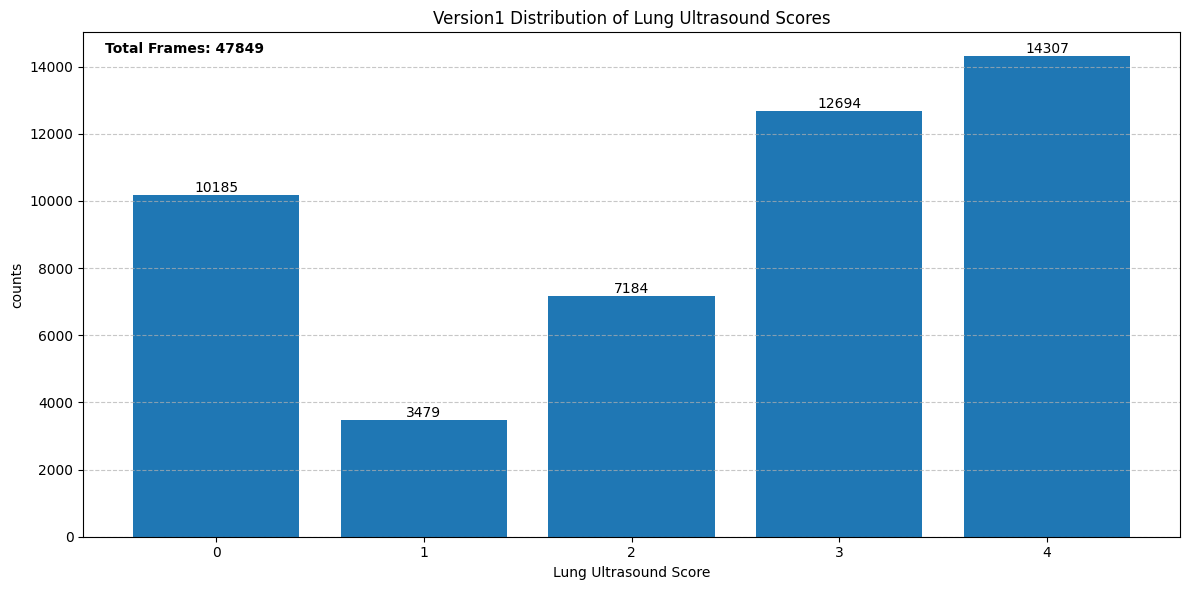

In [43]:
plt.figure(figsize=(12, 6))
bars = plt.bar(v1_value_counts.index, v1_value_counts.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.title('Version1 Distribution of Lung Ultrasound Scores')
plt.xlabel('Lung Ultrasound Score')
plt.ylabel('counts')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Total frame 수 계산
total_frames = v1_value_counts.sum()

# Total frame 수를 그래프 왼쪽 위에 표시
plt.text(0.02, 0.98, f'Total Frames: {total_frames}', 
         transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='left',
         fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [44]:
v2_value_counts =  merged_video_v2_df['Lung ultrasound score_lbl'].value_counts().sort_index()

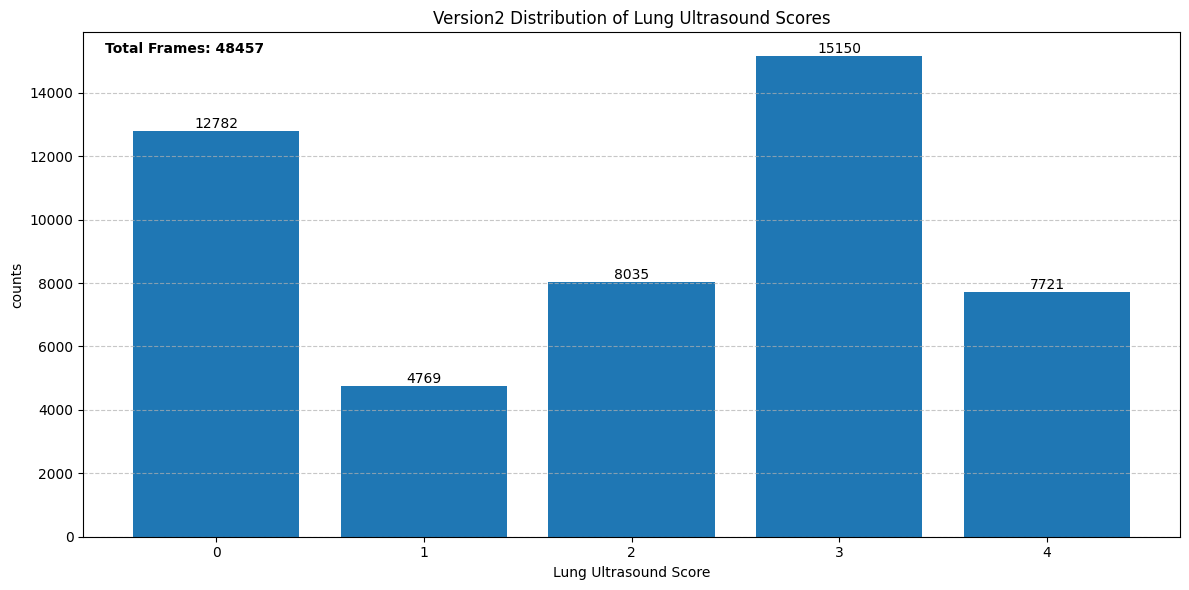

In [45]:
plt.figure(figsize=(12, 6))
bars = plt.bar(v2_value_counts.index, v2_value_counts.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.title('Version2 Distribution of Lung Ultrasound Scores')
plt.xlabel('Lung Ultrasound Score')
plt.ylabel('counts')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Total frame 수 계산
total_frames = v2_value_counts.sum()

# Total frame 수를 그래프 왼쪽 위에 표시
plt.text(0.02, 0.98, f'Total Frames: {total_frames}', 
         transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='left',
         fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

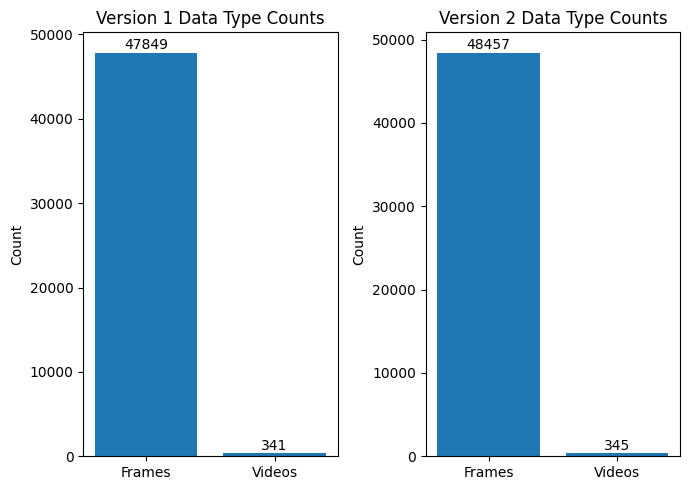

In [46]:
import matplotlib.pyplot as plt

# 데이터 값
new_v1_total_frame_count = len(merged_video_v1_df)
new_v1_total_video_count = merged_video_v1_df['study_id'].nunique()
new_v1_score_counts = [
    len(merged_video_v1_df[merged_video_v1_df['Lung ultrasound score_lbl'] == 0]),
    len(merged_video_v1_df[merged_video_v1_df['Lung ultrasound score_lbl'] == 1]),
    len(merged_video_v1_df[merged_video_v1_df['Lung ultrasound score_lbl'] == 2]),
    len(merged_video_v1_df[merged_video_v1_df['Lung ultrasound score_lbl'] == 3]),
    len(merged_video_v1_df[merged_video_v1_df['Lung ultrasound score_lbl'] == 4])
]

new_v2_total_frame_count = len(merged_video_v2_df)
new_v2_total_video_count = merged_video_v2_df['study_id'].nunique()
new_v2_score_counts = [
    len(merged_video_v2_df[merged_video_v2_df['Lung ultrasound score_lbl'] == 0]),
    len(merged_video_v2_df[merged_video_v2_df['Lung ultrasound score_lbl'] == 1]),
    len(merged_video_v2_df[merged_video_v2_df['Lung ultrasound score_lbl'] == 2]),
    len(merged_video_v2_df[merged_video_v2_df['Lung ultrasound score_lbl'] == 3]),
    len(merged_video_v2_df[merged_video_v2_df['Lung ultrasound score_lbl'] == 4])
]

# 플로팅
fig, axs = plt.subplots(1, 2, figsize=(7, 5))

# new_v1 데이터 플로팅
bars = axs[0].bar(['Frames', 'Videos'], [new_v1_total_frame_count, new_v1_total_video_count])
axs[0].set_title('Version 1 Data Type Counts')
axs[0].set_ylabel('Count')
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

# new_v2 데이터 플로팅
bars = axs[1].bar(['Frames', 'Videos'], [new_v2_total_frame_count, new_v2_total_video_count])
axs[1].set_title('Version 2 Data Type Counts')
axs[1].set_ylabel('Count')
for bar in bars:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [53]:
merged_video_v1_df.columns

Index(['PatientID', 'Data_idx', 'StudyDate', 'Data_type', 'A-line', 'B-line',
       'Confluent B-line', 'Consolidation', 'Pleural effusion', 'Lung sliding',
       'Lung Ultrasound Score', 'study_id', 'FileName', 'A-line_lbl',
       'B-line_lbl', 'Confluent B-line_lbl', 'Consolidation_lbl',
       'Pleural effusion_lbl', 'img_path', 'Lung ultrasound score_lbl'],
      dtype='object')

# multi-label classification csv split

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import os

## version 1

In [55]:
pwd

'/home/work/LUS/code'

- 5 artifacts
    - A-line / B-line, confluent B-line / Consolidation / Effusion / No finding

In [177]:
# score 4 제외
# class_5_new_v1_df = merged_video_v1_df[merged_video_v1_df['Lung ultrasound score_lbl'] != 4]

# print(len(class_5_new_v1_df))
print(len(merged_video_v1_df))
print(len(merged_video_v1_df[merged_video_v1_df['Lung ultrasound score_lbl'] == 4]))
print(len(merged_video_v1_df[merged_video_v1_df['Lung ultrasound score_lbl'] != 4]))

47849
14307
33542


In [179]:
merged_video_v1_df['total-B-line_lbl'] = ((merged_video_v1_df['B-line_lbl'] == 1) | (merged_video_v1_df['Confluent B-line_lbl'] == 1)).astype(int)

new_column_order = [
    'PatientID', 'Data_idx', 'StudyDate', 'Data_type', 'A-line', 'B-line',
    'Confluent B-line', 'Consolidation', 'Pleural effusion', 'Lung sliding',
    'Lung Ultrasound Score', 'study_id', 'FileName', 'A-line_lbl',
    'B-line_lbl', 'Confluent B-line_lbl', 'total-B-line_lbl', 'Consolidation_lbl',
    'Pleural effusion_lbl', 'img_path', 'Lung ultrasound score_lbl',
    'raw_avi_path'
]

merged_video_v1_df = merged_video_v1_df.reindex(columns=new_column_order)
merged_video_v1_df.head()

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,total-B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path
0,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_1,0,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...
1,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_10,0,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...
2,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_11,0,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...
3,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_25,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
4,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_26,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...


In [65]:
patient_lst = merged_video_v1_df['PatientID'].unique()

# 전체 데이터에서 test set split 및 고정
train_val_patient_lst, test_patient_lst = train_test_split(patient_lst, test_size=0.2, random_state=1234)

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

for fold, (train_idx, val_idx) in enumerate(kf.split(train_val_patient_lst)):
    
    print(f"Fold : {fold} Start!!!")
        
    train_list = [train_val_patient_lst[i] for i in train_idx]
    val_list = [train_val_patient_lst[i] for i in val_idx]
    
    print(f"[patient_num] : train_patient : {len(train_list)}, val_patient : {len(val_list)}, test_patient : {len(test_patient_lst)}")
    
    train_df = merged_video_v1_df[merged_video_v1_df['PatientID'].isin(train_list)].reset_index(drop=True)
    valid_df = merged_video_v1_df[merged_video_v1_df['PatientID'].isin(val_list)].reset_index(drop=True)
    test_df = merged_video_v1_df[merged_video_v1_df['PatientID'].isin(test_patient_lst)].reset_index(drop=True)
    
    scores = range(4)  

    print(f"total train count : {len(train_df)}")
    print(f"total valid count : {len(valid_df)}")
    print(f"total test count : {len(test_df)}")
    print('-'*50)
    
    for score in scores:
        print(f"train_{score}'s count: {len(train_df[train_df['Lung ultrasound score_lbl'] == score])}")
        print(f"validation_{score}'s count: {len(valid_df[valid_df['Lung ultrasound score_lbl'] == score])}")
        print(f"test_{score}'s count: {len(test_df[test_df['Lung ultrasound score_lbl'] == score])}")
        
    print('#'*50)
    if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_1/5_artifacts/fold_{fold}'):
        os.makedirs(f'/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}')
    train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/train.csv", index=False)
    valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/valid.csv", index=False)
    test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/test.csv", index=False)  
    
print('-'*50)

Fold : 0 Start!!!
[patient_num] : train_patient : 22, val_patient : 6, test_patient : 7
total train count : 22774
total valid count : 4629
total test count : 6139
--------------------------------------------------
train_0's count: 6493
validation_0's count: 1541
test_0's count: 2151
train_1's count: 2712
validation_1's count: 371
test_1's count: 396
train_2's count: 5449
validation_2's count: 865
test_2's count: 870
train_3's count: 8120
validation_3's count: 1852
test_3's count: 2722
##################################################
Fold : 1 Start!!!
[patient_num] : train_patient : 22, val_patient : 6, test_patient : 7
total train count : 21560
total valid count : 5843
total test count : 6139
--------------------------------------------------
train_0's count: 5420
validation_0's count: 2614
test_0's count: 2151
train_1's count: 2531
validation_1's count: 552
test_1's count: 396
train_2's count: 5659
validation_2's count: 655
test_2's count: 870
train_3's count: 7950
validation_3's co

In [57]:
print(train_df['img_path'].iloc[0])
train_df.head()

NameError: name 'train_df' is not defined

- 4 artifacts
    - A-line / B-line, confluent B-line / Consolidation / Effusion

In [180]:
class_4_new_v1_df = merged_video_v1_df[merged_video_v1_df['Lung ultrasound score_lbl'] != 4]

class_4_new_v1_df.head()

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,total-B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path
3,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_25,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
4,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_26,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
5,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_27,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
13,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_24,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
21,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_28,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...


In [69]:
patient_lst = class_4_new_v1_df['PatientID'].unique()

# 전체 데이터에서 test set split 및 고정
train_val_patient_lst, test_patient_lst = train_test_split(patient_lst, test_size=0.2, random_state=1234)

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

for fold, (train_idx, val_idx) in enumerate(kf.split(train_val_patient_lst)):
    
    print(f"Fold : {fold} Start!!!")
        
    train_list = [train_val_patient_lst[i] for i in train_idx]
    val_list = [train_val_patient_lst[i] for i in val_idx]
    
    print(f"[patient_num] : train_patient : {len(train_list)}, val_patient : {len(val_list)}, test_patient : {len(test_patient_lst)}")
    
    train_df = class_4_new_v1_df[class_4_new_v1_df['PatientID'].isin(train_list)].reset_index(drop=True)
    valid_df = class_4_new_v1_df[class_4_new_v1_df['PatientID'].isin(val_list)].reset_index(drop=True)
    test_df = class_4_new_v1_df[class_4_new_v1_df['PatientID'].isin(test_patient_lst)].reset_index(drop=True)
    
    scores = range(4)  

    print(f"total train count : {len(train_df)}")
    print(f"total valid count : {len(valid_df)}")
    print(f"total test count : {len(test_df)}")
    print('-'*50)
    
    for score in scores:
        print(f"train_{score}'s count: {len(train_df[train_df['Lung ultrasound score_lbl'] == score])}")
        print(f"validation_{score}'s count: {len(valid_df[valid_df['Lung ultrasound score_lbl'] == score])}")
        print(f"test_{score}'s count: {len(test_df[test_df['Lung ultrasound score_lbl'] == score])}")
        
#     print('#'*50)
#     if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}'):
#         os.makedirs(f'/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}')
#     train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}/train.csv", index=False)
#     valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}/valid.csv", index=False)
#     test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}/test.csv", index=False)  
    
print('-'*50)

Fold : 0 Start!!!
[patient_num] : train_patient : 22, val_patient : 6, test_patient : 7
total train count : 22774
total valid count : 4629
total test count : 6139
--------------------------------------------------
train_0's count: 6493
validation_0's count: 1541
test_0's count: 2151
train_1's count: 2712
validation_1's count: 371
test_1's count: 396
train_2's count: 5449
validation_2's count: 865
test_2's count: 870
train_3's count: 8120
validation_3's count: 1852
test_3's count: 2722
Fold : 1 Start!!!
[patient_num] : train_patient : 22, val_patient : 6, test_patient : 7
total train count : 21560
total valid count : 5843
total test count : 6139
--------------------------------------------------
train_0's count: 5420
validation_0's count: 2614
test_0's count: 2151
train_1's count: 2531
validation_1's count: 552
test_1's count: 396
train_2's count: 5659
validation_2's count: 655
test_2's count: 870
train_3's count: 7950
validation_3's count: 2022
test_3's count: 2722
Fold : 2 Start!!!
[p

## version 2

In [178]:
# class_5_new_v2_df = merged_video_v2_df[merged_video_v2_df['Lung ultrasound score_lbl'] != 4]

print(len(merged_video_v2_df))
print(len(merged_video_v2_df[merged_video_v2_df['Lung ultrasound score_lbl'] == 4]))
print(len(merged_video_v2_df[merged_video_v2_df['Lung ultrasound score_lbl'] != 4]))

48457
7721
40736


In [181]:
merged_video_v2_df['total-B-line_lbl'] = ((merged_video_v2_df['B-line_lbl'] == 1) | (merged_video_v2_df['Confluent B-line_lbl'] == 1)).astype(int)

new_column_order = [
    'PatientID', 'Data_idx', 'StudyDate', 'Data_type', 'A-line', 'B-line',
    'Confluent B-line', 'Consolidation', 'Pleural effusion', 'Lung sliding',
    'Lung Ultrasound Score', 'study_id', 'FileName', 'A-line_lbl',
    'B-line_lbl', 'Confluent B-line_lbl', 'total-B-line_lbl', 'Consolidation_lbl',
    'Pleural effusion_lbl', 'img_path', 'Lung ultrasound score_lbl',
    'raw_avi_path'
]

merged_video_v2_df = merged_video_v2_df.reindex(columns=new_column_order)
merged_video_v2_df.head()

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,total-B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path
0,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,...,24965778_00002_1,0,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...
1,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,...,24965778_00002_19,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
2,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,...,24965778_00002_24,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
3,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,...,24965778_00002_21,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
4,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,...,24965778_00002_15,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...


- 5 artifacts
    - A-line / B-line, confluent B-line / Consolidation / Effusion / No finding

In [71]:
patient_lst = merged_video_v2_df['PatientID'].unique()

# 전체 데이터에서 test set split 및 고정
train_val_patient_lst, test_patient_lst = train_test_split(patient_lst, test_size=0.2, random_state=1234)

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

for fold, (train_idx, val_idx) in enumerate(kf.split(train_val_patient_lst)):
    
    print(f"Fold : {fold} Start!!!")
        
    train_list = [train_val_patient_lst[i] for i in train_idx]
    val_list = [train_val_patient_lst[i] for i in val_idx]
    
    print(f"[patient_num] : train_patient : {len(train_list)}, val_patient : {len(val_list)}, test_patient : {len(test_patient_lst)}")
    
    train_df = merged_video_v2_df[merged_video_v2_df['PatientID'].isin(train_list)].reset_index(drop=True)
    valid_df = merged_video_v2_df[merged_video_v2_df['PatientID'].isin(val_list)].reset_index(drop=True)
    test_df = merged_video_v2_df[merged_video_v2_df['PatientID'].isin(test_patient_lst)].reset_index(drop=True)
    
    scores = range(4)  

    print(f"total train count : {len(train_df)}")
    print(f"total valid count : {len(valid_df)}")
    print(f"total test count : {len(test_df)}")
    print('-'*50)
    
    for score in scores:
        print(f"train_{score}'s count: {len(train_df[train_df['Lung ultrasound score_lbl'] == score])}")
        print(f"validation_{score}'s count: {len(valid_df[valid_df['Lung ultrasound score_lbl'] == score])}")
        print(f"test_{score}'s count: {len(test_df[test_df['Lung ultrasound score_lbl'] == score])}")
        
    print('#'*50)
    if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_2/5_artifacts/fold_{fold}'):
        os.makedirs(f'/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_2/5_artifacts/fold_{fold}')
    train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_2/5_artifacts/fold_{fold}/train.csv", index=False)
    valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_2/5_artifacts/fold_{fold}/valid.csv", index=False)
    test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_2/5_artifacts/fold_{fold}/test.csv", index=False)  
    
print('-'*50)

Fold : 0 Start!!!
[patient_num] : train_patient : 22, val_patient : 6, test_patient : 7
total train count : 27048
total valid count : 6068
total test count : 7620
--------------------------------------------------
train_0's count: 7539
validation_0's count: 2416
test_0's count: 2827
train_1's count: 3758
validation_1's count: 550
test_1's count: 461
train_2's count: 6246
validation_2's count: 919
test_2's count: 870
train_3's count: 9505
validation_3's count: 2183
test_3's count: 3462
##################################################
Fold : 1 Start!!!
[patient_num] : train_patient : 22, val_patient : 6, test_patient : 7
total train count : 26161
total valid count : 6955
total test count : 7620
--------------------------------------------------
train_0's count: 6571
validation_0's count: 3384
test_0's count: 2827
train_1's count: 3622
validation_1's count: 686
test_1's count: 461
train_2's count: 6498
validation_2's count: 667
test_2's count: 870
train_3's count: 9470
validation_3's co

In [72]:
print(train_df['img_path'].iloc[0])
train_df.head()

/home/work/LUS/Dataset/dcm_to_png/all_frame/version_2/24965778/24965778_00002_19.png


,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,Lung Ultrasound Score,study_id,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl
0,24965778.0,2.0,20230614.0,video,NaN,15_33,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_19,0,1,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1
1,24965778.0,2.0,20230614.0,video,NaN,15_33,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_24,0,1,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1
2,24965778.0,2.0,20230614.0,video,NaN,15_33,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_21,0,1,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1
3,24965778.0,2.0,20230614.0,video,NaN,15_33,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_15,0,1,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1
4,24965778.0,2.0,20230614.0,video,NaN,15_33,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_17,0,1,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1


- 4 artifacts
    - A-line / B-line, confluent B-line / Consolidation / Effusion

In [182]:
class_4_new_v2_df = merged_video_v2_df[merged_video_v2_df['Lung ultrasound score_lbl'] != 4]

print(len(merged_video_v2_df))
print(len(merged_video_v2_df[merged_video_v2_df['Lung ultrasound score_lbl'] == 4]))
print(len(class_4_new_v2_df))
class_4_new_v2_df.head()

48457
7721
40736


,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,total-B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path
1,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,...,24965778_00002_19,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
2,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,...,24965778_00002_24,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
3,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,...,24965778_00002_21,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
4,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,...,24965778_00002_15,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
7,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,...,24965778_00002_17,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...


In [74]:
patient_lst = class_4_new_v2_df['PatientID'].unique()

# 전체 데이터에서 test set split 및 고정
train_val_patient_lst, test_patient_lst = train_test_split(patient_lst, test_size=0.2, random_state=1234)

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

for fold, (train_idx, val_idx) in enumerate(kf.split(train_val_patient_lst)):
    
    print(f"Fold : {fold} Start!!!")
        
    train_list = [train_val_patient_lst[i] for i in train_idx]
    val_list = [train_val_patient_lst[i] for i in val_idx]
    
    print(f"[patient_num] : train_patient : {len(train_list)}, val_patient : {len(val_list)}, test_patient : {len(test_patient_lst)}")
    
    train_df = class_4_new_v2_df[class_4_new_v2_df['PatientID'].isin(train_list)].reset_index(drop=True)
    valid_df = class_4_new_v2_df[class_4_new_v2_df['PatientID'].isin(val_list)].reset_index(drop=True)
    test_df = class_4_new_v2_df[class_4_new_v2_df['PatientID'].isin(test_patient_lst)].reset_index(drop=True)
    
    scores = range(4)  

    print(f"total train count : {len(train_df)}")
    print(f"total valid count : {len(valid_df)}")
    print(f"total test count : {len(test_df)}")
    print('-'*50)
    
    for score in scores:
        print(f"train_{score}'s count: {len(train_df[train_df['Lung ultrasound score_lbl'] == score])}")
        print(f"validation_{score}'s count: {len(valid_df[valid_df['Lung ultrasound score_lbl'] == score])}")
        print(f"test_{score}'s count: {len(test_df[test_df['Lung ultrasound score_lbl'] == score])}")
        
    print('#'*50)
    if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_2/4_artifacts/fold_{fold}'):
        os.makedirs(f'/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_2/4_artifacts/fold_{fold}')
    train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_2/4_artifacts/fold_{fold}/train.csv", index=False)
    valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_2/4_artifacts/fold_{fold}/valid.csv", index=False)
    test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_2/4_artifacts/fold_{fold}/test.csv", index=False)  
    
print('-'*50)

Fold : 0 Start!!!
[patient_num] : train_patient : 22, val_patient : 6, test_patient : 7
total train count : 27048
total valid count : 6068
total test count : 7620
--------------------------------------------------
train_0's count: 7539
validation_0's count: 2416
test_0's count: 2827
train_1's count: 3758
validation_1's count: 550
test_1's count: 461
train_2's count: 6246
validation_2's count: 919
test_2's count: 870
train_3's count: 9505
validation_3's count: 2183
test_3's count: 3462
##################################################
Fold : 1 Start!!!
[patient_num] : train_patient : 22, val_patient : 6, test_patient : 7
total train count : 26161
total valid count : 6955
total test count : 7620
--------------------------------------------------
train_0's count: 6571
validation_0's count: 3384
test_0's count: 2827
train_1's count: 3622
validation_1's count: 686
test_1's count: 461
train_2's count: 6498
validation_2's count: 667
test_2's count: 870
train_3's count: 9470
validation_3's co

In [55]:
# multi label case 확인
mask1 = (class_5_new_v1_df[['A-line_lbl', 'B-line_lbl', 'Confluent B-line_lbl', 'Consolidation_lbl', 'Pleural effusion_lbl']] == 1).sum(axis=1) >= 2
multi_label_v1_df = class_5_new_v1_df[mask1]
single_label_v1_df = class_5_new_v1_df[~mask1]

mask2 = (class_5_new_v2_df[['A-line_lbl', 'B-line_lbl', 'Confluent B-line_lbl', 'Consolidation_lbl', 'Pleural effusion_lbl']] == 1).sum(axis=1) >= 2
multi_label_v2_df = class_5_new_v2_df[mask2]
single_label_v2_df = class_5_new_v2_df[~mask2]

print(f'version_1 single-label counts : {len(single_label_v1_df)}')
print(f'version_1 multi-label counts : {len(multi_label_v1_df)}')

print(f'version_2 single-label counts : {len(single_label_v2_df)}')
print(f'version_2 multi-label counts : {len(multi_label_v2_df)}')

version_1 single-label counts : 30622
version_1 multi-label counts : 2920
version_2 single-label counts : 37511
version_2 multi-label counts : 3225


In [147]:
multi_label_v1_df

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path,total-B-line_lbl
496,30625107,6,20230720,video,NaN,NaN,NaN,1_62,1_62,NaN,...,30625107_00006_1,0,0,0,1,1,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,3,/home/work/LUS/Dataset/processed_dataset_avi/3...,0
497,30625107,6,20230720,video,NaN,NaN,NaN,1_62,1_62,NaN,...,30625107_00006_10,0,0,0,1,1,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,3,/home/work/LUS/Dataset/processed_dataset_avi/3...,0
498,30625107,6,20230720,video,NaN,NaN,NaN,1_62,1_62,NaN,...,30625107_00006_11,0,0,0,1,1,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,3,/home/work/LUS/Dataset/processed_dataset_avi/3...,0
499,30625107,6,20230720,video,NaN,NaN,NaN,1_62,1_62,NaN,...,30625107_00006_12,0,0,0,1,1,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,3,/home/work/LUS/Dataset/processed_dataset_avi/3...,0
500,30625107,6,20230720,video,NaN,NaN,NaN,1_62,1_62,NaN,...,30625107_00006_15,0,0,0,1,1,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,3,/home/work/LUS/Dataset/processed_dataset_avi/3...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46788,56349621,10,20231025,video,NaN,NaN,NaN,1_152,1_152,NaN,...,56349621_00010_96,0,0,0,1,1,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,3,/home/work/LUS/Dataset/processed_dataset_avi/5...,0
46789,56349621,10,20231025,video,NaN,NaN,NaN,1_152,1_152,NaN,...,56349621_00010_97,0,0,0,1,1,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,3,/home/work/LUS/Dataset/processed_dataset_avi/5...,0
46790,56349621,10,20231025,video,NaN,NaN,NaN,1_152,1_152,NaN,...,56349621_00010_95,0,0,0,1,1,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,3,/home/work/LUS/Dataset/processed_dataset_avi/5...,0
46791,56349621,10,20231025,video,NaN,NaN,NaN,1_152,1_152,NaN,...,56349621_00010_92,0,0,0,1,1,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,3,/home/work/LUS/Dataset/processed_dataset_avi/5...,0


## A-line / B-line / Confluent B-line image labeling

In [136]:
# version 1
B_line_severity_v1_df = merged_video_v1_df[merged_video_v1_df['Lung ultrasound score_lbl'].isin([0, 1, 2])]
print('<version 1>')
print(len(merged_video_v2_df))
print(len(B_line_severity_v1_df))
print(f"A-line : {len(B_line_severity_v1_df[B_line_severity_v1_df['Lung ultrasound score_lbl'] == 0])}")
print(f"B-line : {len(B_line_severity_v1_df[B_line_severity_v1_df['Lung ultrasound score_lbl'] == 1])}")
print(f"Confluet B-line : {len(B_line_severity_v1_df[B_line_severity_v1_df['Lung ultrasound score_lbl'] == 2])}")

# version 2
print('<version 2>')
B_line_severity_v2_df = merged_video_v2_df[merged_video_v2_df['Lung ultrasound score_lbl'].isin([0, 1, 2])]
print(len(merged_video_v2_df))
print(len(B_line_severity_v2_df))
print(f"A-line : {len(B_line_severity_v2_df[B_line_severity_v2_df['Lung ultrasound score_lbl'] == 0])}")
print(f"B-line : {len(B_line_severity_v2_df[B_line_severity_v2_df['Lung ultrasound score_lbl'] == 1])}")
print(f"Confluet B-line : {len(B_line_severity_v2_df[B_line_severity_v2_df['Lung ultrasound score_lbl'] == 2])}")

<version 1>
48457
20848
A-line : 10185
B-line : 3479
Confluet B-line : 7184
<version 2>
48457
25586
A-line : 12782
B-line : 4769
Confluet B-line : 8035


In [137]:
B_line_severity_v2_df['img_path']

1        /home/work/LUS/Dataset/dcm_to_png/all_frame/ve...
2        /home/work/LUS/Dataset/dcm_to_png/all_frame/ve...
3        /home/work/LUS/Dataset/dcm_to_png/all_frame/ve...
4        /home/work/LUS/Dataset/dcm_to_png/all_frame/ve...
7        /home/work/LUS/Dataset/dcm_to_png/all_frame/ve...
                               ...                        
48192    /home/work/LUS/Dataset/dcm_to_png/all_frame/ve...
48193    /home/work/LUS/Dataset/dcm_to_png/all_frame/ve...
48194    /home/work/LUS/Dataset/dcm_to_png/all_frame/ve...
48195    /home/work/LUS/Dataset/dcm_to_png/all_frame/ve...
48198    /home/work/LUS/Dataset/dcm_to_png/all_frame/ve...
Name: img_path, Length: 25586, dtype: object

In [139]:
import os
import shutil
from tqdm import tqdm
from PIL import Image

version = "version_2"

destination_dirs = {
    0: f'/home/work/LUS/Dataset/labeling_img/{version}/A-line',
    1: f'/home/work/LUS/Dataset/labeling_img/{version}/B-line',
    2: f'/home/work/LUS/Dataset/labeling_img/{version}/Confluent B-line'
}

# 디렉토리가 존재하지 않으면 생성
for dir_path in destination_dirs.values():
    os.makedirs(dir_path, exist_ok=True)

# 데이터 프레임을 반복하며 이미지 저장
for index, row in tqdm(B_line_severity_v2_df.iterrows(), total=len(B_line_severity_v2_df), desc="Processing images"):
    img_path = row['img_path']
    label = row['Lung ultrasound score_lbl']
    
    try:
        # 이미지 열기
        img = Image.open(img_path)
        
        # 새로운 파일 경로 설정
        img_name = os.path.basename(img_path)
        new_img_path = os.path.join(destination_dirs[label], img_name)
        
        # 이미지 저장
        img.save(new_img_path)
        
        # print(f'Successfully saved {img_name} to {new_img_path}')
    except Exception as e:
        print(f'Failed to process {img_path}: {e}')


Processing images: 100% 25586/25586 [1:06:01<00:00,  6.46it/s]


In [141]:
B_line_severity_v1_df.head()

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,study_id,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path
3,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_25,0,1,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
4,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_26,0,1,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
5,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_27,0,1,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
13,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_24,0,1,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
21,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_28,0,1,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...


# B-line 중증도 분류
- artifacts : A-line / B-line / Confluent B-line

In [134]:
# version 1
B_line_severity_v1_df = merged_video_v1_df[merged_video_v1_df['Lung ultrasound score_lbl'].isin([0, 1, 2])]
print('<version 1>')
print(len(merged_video_v2_df))
print(len(B_line_severity_v1_df))
print(f"A-line : {len(B_line_severity_v1_df[B_line_severity_v1_df['Lung ultrasound score_lbl'] == 0])}")
print(f"B-line : {len(B_line_severity_v1_df[B_line_severity_v1_df['Lung ultrasound score_lbl'] == 1])}")
print(f"Confluet B-line : {len(B_line_severity_v1_df[B_line_severity_v1_df['Lung ultrasound score_lbl'] == 2])}")

# version 2
print('<version 2>')
B_line_severity_v2_df = merged_video_v2_df[merged_video_v2_df['Lung ultrasound score_lbl'].isin([0, 1, 2])]
print(len(merged_video_v2_df))
print(len(B_line_severity_v2_df))
print(f"A-line : {len(B_line_severity_v2_df[B_line_severity_v2_df['Lung ultrasound score_lbl'] == 0])}")
print(f"B-line : {len(B_line_severity_v2_df[B_line_severity_v2_df['Lung ultrasound score_lbl'] == 1])}")
print(f"Confluet B-line : {len(B_line_severity_v2_df[B_line_severity_v2_df['Lung ultrasound score_lbl'] == 2])}")

<version 1>
48457
20848
A-line : 10185
B-line : 3479
Confluet B-line : 7184
<version 2>
48457
25586
A-line : 12782
B-line : 4769
Confluet B-line : 8035


In [135]:
# multi label case 확인
mask1 = (B_line_severity_v1_df[['A-line_lbl', 'B-line_lbl', 'Confluent B-line_lbl']] == 1).sum(axis=1) >= 2
result_df1 = B_line_severity_v1_df[mask1]

mask2 = (B_line_severity_v2_df[['A-line_lbl', 'B-line_lbl', 'Confluent B-line_lbl']] == 1).sum(axis=1) >= 2
result_df2 = B_line_severity_v2_df[mask2]

print(f'version_1 multi-label counts : {len(result_df1)}')
print(f'version_1 multi-label counts : {len(result_df2)}')

version_1 multi-label counts : 0
version_1 multi-label counts : 0


In [286]:
# version 1
patient_lst = B_line_severity_v1_df['PatientID'].unique()

# 전체 데이터에서 test set split 및 고정
train_patient_lst, val_test_patient_lst = train_test_split(patient_lst, test_size=0.2, random_state=1234)

val_patient_lst, test_patient_lst = train_test_split(val_test_patient_lst, test_size=0.5, random_state=1234)
    
print(f"[patient_num] : train_patient : {len(train_patient_lst)}, val_patient : {len(val_patient_lst)}, test_patient : {len(test_patient_lst)}")
    
train_df = B_line_severity_v1_df[B_line_severity_v1_df['PatientID'].isin(train_patient_lst)].reset_index(drop=True)
valid_df = B_line_severity_v1_df[B_line_severity_v1_df['PatientID'].isin(val_patient_lst)].reset_index(drop=True)
test_df = B_line_severity_v1_df[B_line_severity_v1_df['PatientID'].isin(test_patient_lst)].reset_index(drop=True)
    
scores = range(3)  

print(f"total train count : {len(train_df)}")
print(f"total valid count : {len(valid_df)}")
print(f"total test count : {len(test_df)}")
print('-'*50)
    
for score in scores:
    print(f"train_{score}'s count: {len(train_df[train_df['Lung ultrasound score_lbl'] == score])}")
    print(f"validation_{score}'s count: {len(valid_df[valid_df['Lung ultrasound score_lbl'] == score])}")
    print(f"test_{score}'s count: {len(test_df[test_df['Lung ultrasound score_lbl'] == score])}")
        
print('#'*50)
if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/B_line_severity/version_1'):
    os.makedirs(f'/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/B_line_severity/version_1')
train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/B_line_severity/version_1/train.csv", index=False)
valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/B_line_severity/version_1/valid.csv", index=False)
test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/B_line_severity/version_1/test.csv", index=False)  

[patient_num] : train_patient : 27, val_patient : 3, test_patient : 4
total train count : 17573
total valid count : 1514
total test count : 1761
--------------------------------------------------
train_0's count: 8923
validation_0's count: 375
test_0's count: 887
train_1's count: 2855
validation_1's count: 474
test_1's count: 150
train_2's count: 5795
validation_2's count: 665
test_2's count: 724
##################################################


In [285]:
# version 2
patient_lst = B_line_severity_v2_df['PatientID'].unique()

# 전체 데이터에서 test set split 및 고정
train_patient_lst, val_test_patient_lst = train_test_split(patient_lst, test_size=0.2, random_state=1234)

val_patient_lst, test_patient_lst = train_test_split(val_test_patient_lst, test_size=0.5, random_state=1234)
    
print(f"[patient_num] : train_patient : {len(train_patient_lst)}, val_patient : {len(val_patient_lst)}, test_patient : {len(test_patient_lst)}")
    
train_df = B_line_severity_v2_df[B_line_severity_v2_df['PatientID'].isin(train_patient_lst)].reset_index(drop=True)
valid_df = B_line_severity_v2_df[B_line_severity_v2_df['PatientID'].isin(val_patient_lst)].reset_index(drop=True)
test_df = B_line_severity_v2_df[B_line_severity_v2_df['PatientID'].isin(test_patient_lst)].reset_index(drop=True)
    
scores = range(3)  

print(f"total train count : {len(train_df)}")
print(f"total valid count : {len(valid_df)}")
print(f"total test count : {len(test_df)}")
print('-'*50)
    
for score in scores:
    print(f"train_{score}'s count: {len(train_df[train_df['Lung ultrasound score_lbl'] == score])}")
    print(f"validation_{score}'s count: {len(valid_df[valid_df['Lung ultrasound score_lbl'] == score])}")
    print(f"test_{score}'s count: {len(test_df[test_df['Lung ultrasound score_lbl'] == score])}")
        
print('#'*50)
if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/B_line_severity/version_2'):
    os.makedirs(f'/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/B_line_severity/version_2')
train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/B_line_severity/version_2/train.csv", index=False)
valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/B_line_severity/version_2/valid.csv", index=False)
test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/B_line_severity/version_2/test.csv", index=False)  

[patient_num] : train_patient : 27, val_patient : 3, test_patient : 4
total train count : 21371
total valid count : 1810
total test count : 2405
--------------------------------------------------
train_0's count: 11014
validation_0's count: 428
test_0's count: 1340
train_1's count: 3853
validation_1's count: 705
test_1's count: 211
train_2's count: 6504
validation_2's count: 677
test_2's count: 854
##################################################


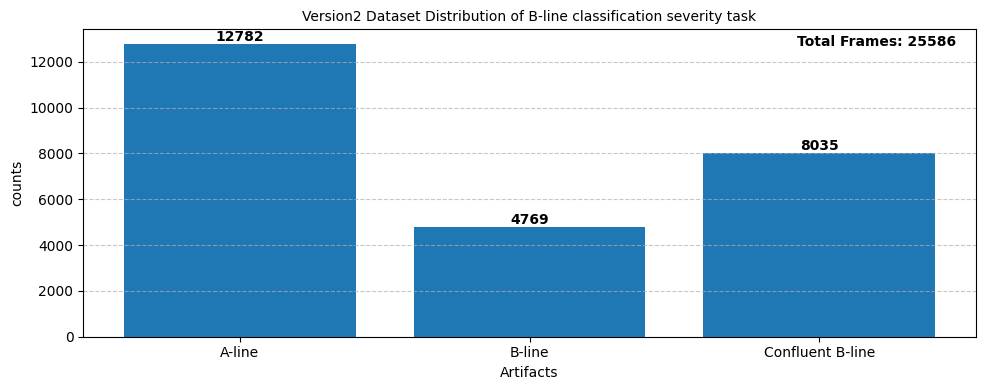

In [324]:
v2_value_counts =  B_line_severity_v2_df['Lung ultrasound score_lbl'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
bars = plt.bar(range(len(v2_value_counts)), v2_value_counts.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom',
             fontsize=10, fontweight='bold')

plt.title('Version2 Dataset Distribution of B-line classification severity task', fontsize=10)
plt.xlabel('Artifacts', fontsize=10)
plt.ylabel('counts', fontsize=10)

x_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars]

plt.xticks(x_centers, [labels_dict.get(i, str(i)) for i in v2_value_counts.index], rotation=0, fontsize=10)
# plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Total frame 수 계산
total_frames = v2_value_counts.sum()

# Total frame 수를 그래프 왼쪽 위에 표시
# plt.text(0.02, 0.98, f'Total Frames: {total_frames}', 
plt.text(0.8, 0.98, f'Total Frames: {total_frames}', 
         transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='left',
         fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [327]:
labels_dict = {
    0 : "A-line",
    1 : "B-line",
    2 : "Confluent B-line",
    3 : "Consolidation",
    4 : "Pleural effusion"
}

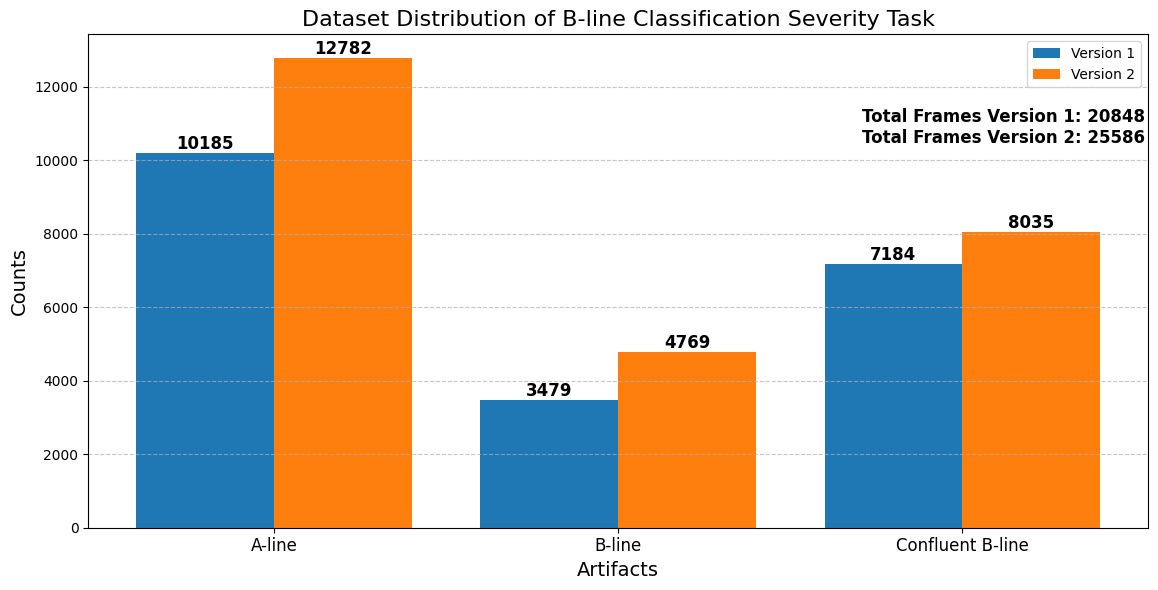

In [334]:
v1_value_counts = B_line_severity_v1_df['Lung ultrasound score_lbl'].value_counts().sort_index()
v2_value_counts = B_line_severity_v2_df['Lung ultrasound score_lbl'].value_counts().sort_index()

# 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

width = 0.4  # 막대의 너비
x = range(len(v1_value_counts))  # x 좌표

bars1 = ax.bar([p - width/2 for p in x], v1_value_counts.values, width=width, label='Version 1')
bars2 = ax.bar([p + width/2 for p in x], v2_value_counts.values, width=width, label='Version 2')

# 막대 위의 텍스트 추가
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height}',
                ha='center', va='bottom',
                fontsize=12, fontweight='bold')

# 제목과 축 레이블
ax.set_title('Dataset Distribution of B-line Classification Severity Task', fontsize=16)
ax.set_xlabel('Artifacts', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)

# x축 레이블 설정
x_centers = [p for p in x]
ax.set_xticks(x_centers)
ax.set_xticklabels([labels_dict.get(i, str(i)) for i in v1_value_counts.index], rotation=0, fontsize=12)

# 그리드 설정
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 총 프레임 수 계산
total_frames_v1 = v1_value_counts.sum()
total_frames_v2 = v2_value_counts.sum()

# 총 프레임 수를 그래프 오른쪽 위에 표시
ax.text(0.73, 0.85, f'Total Frames Version 1: {total_frames_v1}\nTotal Frames Version 2: {total_frames_v2}', 
        transform=ax.transAxes,
        verticalalignment='top', horizontalalignment='left',
        fontsize=12, fontweight='bold')

# 범례 추가
ax.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [346]:
print(B_line_severity_v1_df['img_path'].iloc[-1])
B_line_severity_v1_df[B_line_severity_v1_df['Lung ultrasound score_lbl'] == 1]['img_path'].iloc[-1]

/home/work/LUS/Dataset/dcm_to_png/all_frame/version_1/57786317/57786317_00008_134.png


'/home/work/LUS/Dataset/dcm_to_png/all_frame/version_1/56349621/56349621_00007_97.png'

In [144]:
# multi label case 확인
mask1 = (B_line_severity_v1_df[['A-line_lbl', 'B-line_lbl', 'Confluent B-line_lbl']] == 1).sum(axis=1) >= 2
multi_label_v1_df = B_line_severity_v1_df[mask1]
single_label_v1_df = B_line_severity_v1_df[~mask1]

mask2 = (B_line_severity_v2_df[['A-line_lbl', 'B-line_lbl', 'Confluent B-line_lbl']] == 1).sum(axis=1) >= 2
multi_label_v2_df = B_line_severity_v2_df[mask2]
single_label_v2_df = B_line_severity_v2_df[~mask2]

print(f'version_1 single-label counts : {len(single_label_v1_df)}')
print(f'version_1 multi-label counts : {len(multi_label_v1_df)}')

print(f'version_2 single-label counts : {len(single_label_v2_df)}')
print(f'version_2 multi-label counts : {len(multi_label_v2_df)}')

version_1 single-label counts : 20848
version_1 multi-label counts : 0
version_2 single-label counts : 25586
version_2 multi-label counts : 0


### 초음파 이미지 FFT 과정 결과 이미지 저장

In [351]:
merged_video_v1_df.head()

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,study_id,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path
0,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_1,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...
1,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_10,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...
2,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_11,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...
3,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_25,0,1,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
4,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_26,0,1,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...


# pleural effusion binary classification

In [354]:
# version 2 > score 4 제외
class_5_new_v1_df = merged_video_v1_df[merged_video_v1_df['Lung ultrasound score_lbl'] != 4]

print(len(merged_video_v1_df))
print(len(class_5_new_v1_df))
print('#'*30)
# version 2 > score 4 제외
class_5_new_v2_df = merged_video_v2_df[merged_video_v2_df['Lung ultrasound score_lbl'] != 4]

print(len(merged_video_v2_df))
print(len(class_5_new_v2_df))

47849
33542
14307
##############################
48457
40736
7721


In [356]:
# version 1
pleural_effusion_v1_df = class_5_new_v1_df.copy()

pleural_effusion_v1_df['Effusion_label'] = pleural_effusion_v1_df['Pleural effusion_lbl'].apply(lambda x: 1 if x == 1 else 0)
print('<version 1>')
print(len(class_5_new_v1_df))
print(len(pleural_effusion_v1_df))
print(f"Effusion_label presence : {len(pleural_effusion_v1_df[pleural_effusion_v1_df['Effusion_label'] == 0])}")
print(f"Effusion_label absence: {len(pleural_effusion_v1_df[pleural_effusion_v1_df['Effusion_label'] == 1])}")

# version 2
pleural_effusion_v2_df = class_5_new_v2_df.copy()

pleural_effusion_v2_df['Effusion_label'] = pleural_effusion_v2_df['Pleural effusion_lbl'].apply(lambda x: 1 if x == 1 else 0)
print('<version 2>')
print(len(class_5_new_v2_df))
print(len(pleural_effusion_v2_df))
print(f"Effusion_label presence : {len(pleural_effusion_v2_df[pleural_effusion_v2_df['Effusion_label'] == 0])}")
print(f"Effusion_label absence: {len(pleural_effusion_v2_df[pleural_effusion_v2_df['Effusion_label'] == 1])}")

<version 1>
33542
33542
Effusion_label presence : 29233
Effusion_label absence: 4309
<version 2>
40736
40736
Effusion_label presence : 36023
Effusion_label absence: 4713


In [357]:
# version 1
patient_lst = pleural_effusion_v1_df['PatientID'].unique()

# 전체 데이터에서 test set split 및 고정
train_patient_lst, val_test_patient_lst = train_test_split(patient_lst, test_size=0.2, random_state=1234)

val_patient_lst, test_patient_lst = train_test_split(val_test_patient_lst, test_size=0.5, random_state=1234)
    
print(f"[patient_num] : train_patient : {len(train_patient_lst)}, val_patient : {len(val_patient_lst)}, test_patient : {len(test_patient_lst)}")
    
train_df = pleural_effusion_v1_df[pleural_effusion_v1_df['PatientID'].isin(train_patient_lst)].reset_index(drop=True)
valid_df = pleural_effusion_v1_df[pleural_effusion_v1_df['PatientID'].isin(val_patient_lst)].reset_index(drop=True)
test_df = pleural_effusion_v1_df[pleural_effusion_v1_df['PatientID'].isin(test_patient_lst)].reset_index(drop=True)
    
scores = range(2)  

print(f"total train count : {len(train_df)}")
print(f"total valid count : {len(valid_df)}")
print(f"total test count : {len(test_df)}")
print('-'*50)
    
for score in scores:
    print(f"train_{score}'s count: {len(train_df[train_df['Effusion_label'] == score])}")
    print(f"validation_{score}'s count: {len(valid_df[valid_df['Effusion_label'] == score])}")
    print(f"test_{score}'s count: {len(test_df[test_df['Effusion_label'] == score])}")
        
print('#'*50)
if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/Pleural_effusion/version_1'):
    os.makedirs(f'/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/Pleural_effusion/version_1')
train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/Pleural_effusion/version_1/train.csv", index=False)
valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/Pleural_effusion/version_1/valid.csv", index=False)
test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/Pleural_effusion/version_1/test.csv", index=False)  

[patient_num] : train_patient : 28, val_patient : 3, test_patient : 4
total train count : 27403
total valid count : 2490
total test count : 3649
--------------------------------------------------
train_0's count: 24332
validation_0's count: 1504
test_0's count: 3397
train_1's count: 3071
validation_1's count: 986
test_1's count: 252
##################################################


In [358]:
# version 2
patient_lst = pleural_effusion_v2_df['PatientID'].unique()

# 전체 데이터에서 test set split 및 고정
train_patient_lst, val_test_patient_lst = train_test_split(patient_lst, test_size=0.2, random_state=1234)

val_patient_lst, test_patient_lst = train_test_split(val_test_patient_lst, test_size=0.5, random_state=1234)
    
print(f"[patient_num] : train_patient : {len(train_patient_lst)}, val_patient : {len(val_patient_lst)}, test_patient : {len(test_patient_lst)}")
    
train_df = pleural_effusion_v2_df[pleural_effusion_v2_df['PatientID'].isin(train_patient_lst)].reset_index(drop=True)
valid_df = pleural_effusion_v2_df[pleural_effusion_v2_df['PatientID'].isin(val_patient_lst)].reset_index(drop=True)
test_df = pleural_effusion_v2_df[pleural_effusion_v2_df['PatientID'].isin(test_patient_lst)].reset_index(drop=True)
    
scores = range(2)  

print(f"total train count : {len(train_df)}")
print(f"total valid count : {len(valid_df)}")
print(f"total test count : {len(test_df)}")
print('-'*50)
    
for score in scores:
    print(f"train_{score}'s count: {len(train_df[train_df['Effusion_label'] == score])}")
    print(f"validation_{score}'s count: {len(valid_df[valid_df['Effusion_label'] == score])}")
    print(f"test_{score}'s count: {len(test_df[test_df['Effusion_label'] == score])}")
        
print('#'*50)
if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/Pleural_effusion/version_2'):
    os.makedirs(f'/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/Pleural_effusion/version_2')
train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/Pleural_effusion/version_2/train.csv", index=False)
valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/Pleural_effusion/version_2/valid.csv", index=False)
test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multiclass_classification/Pleural_effusion/version_2/test.csv", index=False)  

[patient_num] : train_patient : 28, val_patient : 3, test_patient : 4
total train count : 33116
total valid count : 2631
total test count : 4989
--------------------------------------------------
train_0's count: 29804
validation_0's count: 1534
test_0's count: 4685
train_1's count: 3312
validation_1's count: 1097
test_1's count: 304
##################################################


In [399]:
labels_dict = {
    0 : "A-line",
    1 : "B-line",
    2 : "Confluent B-line",
    3 : "Consolidation",
    4 : "Pleural effusion"
}
labels_dict.get(0)

'A-line'

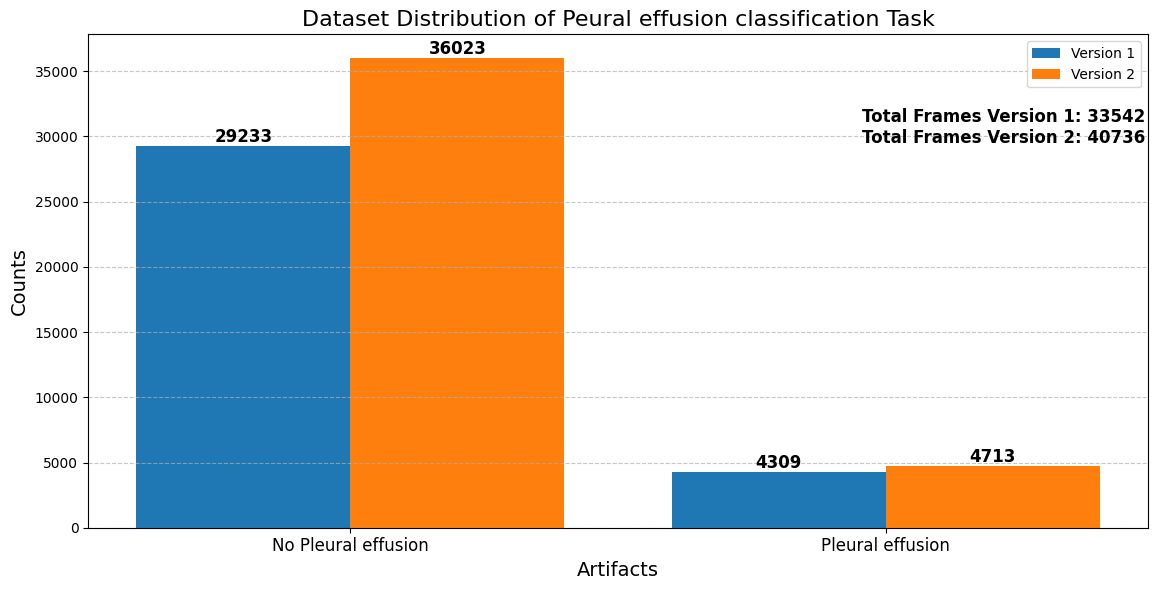

In [400]:
labels_dict = {
    0 : "No Pleural effusion",
    1 : "Pleural effusion"
}

v1_value_counts = pleural_effusion_v1_df['Effusion_label'].value_counts().sort_index()
v2_value_counts = pleural_effusion_v2_df['Effusion_label'].value_counts().sort_index()

# 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

width = 0.4  # 막대의 너비
x = range(len(v1_value_counts))  # x 좌표

bars1 = ax.bar([p - width/2 for p in x], v1_value_counts.values, width=width, label='Version 1')
bars2 = ax.bar([p + width/2 for p in x], v2_value_counts.values, width=width, label='Version 2')

# 막대 위의 텍스트 추가
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height}',
                ha='center', va='bottom',
                fontsize=12, fontweight='bold')

# 제목과 축 레이블
ax.set_title('Dataset Distribution of Peural effusion classification Task', fontsize=16)
ax.set_xlabel('Artifacts', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)

# x축 레이블 설정
x_centers = [p for p in x]
ax.set_xticks(x_centers)
ax.set_xticklabels([labels_dict.get(i, str(i)) for i in v1_value_counts.index], rotation=0, fontsize=12)

# 그리드 설정
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 총 프레임 수 계산
total_frames_v1 = v1_value_counts.sum()
total_frames_v2 = v2_value_counts.sum()

# 총 프레임 수를 그래프 오른쪽 위에 표시
ax.text(0.73, 0.85, f'Total Frames Version 1: {total_frames_v1}\nTotal Frames Version 2: {total_frames_v2}', 
        transform=ax.transAxes,
        verticalalignment='top', horizontalalignment='left',
        fontsize=12, fontweight='bold')

# 범례 추가
ax.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

- effusion cases images 따로 정리

In [363]:
# effusion case 정리
presence_effusion_v1_df = pleural_effusion_v1_df[pleural_effusion_v1_df['Effusion_label'] == 1]
presence_effusion_v2_df = pleural_effusion_v2_df[pleural_effusion_v2_df['Effusion_label'] == 1]

print(len(presence_effusion_v1_df))
print(len(presence_effusion_v2_df))

4309
4713


In [365]:
a = presence_effusion_v2_df['img_path'].iloc[0]
os.path.basename(a)
presence_effusion_v1_df.shape[0]

4309

In [370]:
import os
import shutil
from PIL import Image

destination_dir = '/home/work/LUS/Dataset/Effusion_cases/version_1'

# 디렉토리가 존재하지 않으면 생성
os.makedirs(destination_dir, exist_ok=True)

for index, row in tqdm(presence_effusion_v1_df.iterrows(), total=len(presence_effusion_v1_df), desc="Processing images"):
    img_path = row['img_path']
    try:
        # 이미지 열기
        img = Image.open(img_path)
        
        # 새로운 파일 경로 설정
        img_name = os.path.basename(img_path)
        new_img_path = os.path.join(destination_dir, img_name)
        
        # 이미지 저장
        img.save(new_img_path)
        
#         print(f'Successfully saved {img_name} to {new_img_path}')
    except Exception as e:
        print(f'Failed to process {img_path}: {e}')

Processing images: 100% 4309/4309 [10:53<00:00,  6.59it/s]


In [371]:
destination_dir = '/home/work/LUS/Dataset/Effusion_cases/version_2'

# 디렉토리가 존재하지 않으면 생성
os.makedirs(destination_dir, exist_ok=True)

for index, row in tqdm(presence_effusion_v2_df.iterrows(), total=len(presence_effusion_v2_df), desc="Processing images"):
    img_path = row['img_path']
    try:
        # 이미지 열기
        img = Image.open(img_path)
        
        # 새로운 파일 경로 설정
        img_name = os.path.basename(img_path)
        new_img_path = os.path.join(destination_dir, img_name)
        
        # 이미지 저장
        img.save(new_img_path)
        
#         print(f'Successfully saved {img_name} to {new_img_path}')
    except Exception as e:
        print(f'Failed to process {img_path}: {e}')

Processing images: 100% 4713/4713 [12:35<00:00,  6.24it/s]


# video

In [47]:
import cv2
from tqdm import tqdm
import re
import os
import sys
import cv2
import math
import time
import shutil

import pandas as pd
import numpy as np

In [48]:
def create_raw_avi_path(row):
    parts = row['FileName'].split('_')
    return f"/data2/hoon2/LUS_Dataset/processed_dataset_avi/{parts[0]}/{parts[1]}.avi"

In [49]:
merged_video_v1_df.head()

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,Lung Ultrasound Score,study_id,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl
0,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_31,0,1,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,1
1,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_62,0,0,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,4
2,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_22,0,0,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,4
3,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_53,0,0,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,4
4,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,1,24965778_2,24965778_00002_56,0,0,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,4


In [50]:
merged_video_v1_df['raw_avi_path'] = merged_video_v1_df.apply(create_raw_avi_path, axis=1)
merged_video_v2_df['raw_avi_path'] = merged_video_v2_df.apply(create_raw_avi_path, axis=1)

In [51]:
print(merged_video_v1_df.iloc[0]['raw_avi_path'])
merged_video_v1_df.head()

/data2/hoon2/LUS_Dataset/processed_dataset_avi/24965778/00002.avi


,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,study_id,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path
0,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_31,0,1,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,1,/data2/hoon2/LUS_Dataset/processed_dataset_avi...
1,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_62,0,0,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,4,/data2/hoon2/LUS_Dataset/processed_dataset_avi...
2,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_22,0,0,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,4,/data2/hoon2/LUS_Dataset/processed_dataset_avi...
3,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_53,0,0,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,4,/data2/hoon2/LUS_Dataset/processed_dataset_avi...
4,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_56,0,0,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,4,/data2/hoon2/LUS_Dataset/processed_dataset_avi...


In [52]:
print(len(set(list(merged_video_v1_df['raw_avi_path']))))
print(len(set(list(merged_video_v2_df['raw_avi_path']))))

341
345


In [53]:
merged_video_v1_df.head()

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,study_id,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path
0,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_31,0,1,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,1,/data2/hoon2/LUS_Dataset/processed_dataset_avi...
1,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_62,0,0,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,4,/data2/hoon2/LUS_Dataset/processed_dataset_avi...
2,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_22,0,0,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,4,/data2/hoon2/LUS_Dataset/processed_dataset_avi...
3,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_53,0,0,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,4,/data2/hoon2/LUS_Dataset/processed_dataset_avi...
4,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_56,0,0,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,4,/data2/hoon2/LUS_Dataset/processed_dataset_avi...


## raw video에서 clip 형성

In [54]:
video_v1_df = merged_video_v1_df.drop_duplicates(subset=['study_id'])
video_v2_df = merged_video_v2_df.drop_duplicates(subset=['study_id'])

video_v1_df.head()

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,study_id,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path
0,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_31,0,1,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,1,/data2/hoon2/LUS_Dataset/processed_dataset_avi...
62,24965778,3,20230614,video,NaN,24_27,NaN,NaN,NaN,NaN,...,24965778_3,24965778_00003_22,0,0,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,4,/data2/hoon2/LUS_Dataset/processed_dataset_avi...
124,24965778,4,20230614,video,NaN,NaN,NaN,2_18,NaN,NaN,...,24965778_4,24965778_00004_33,0,0,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,4,/data2/hoon2/LUS_Dataset/processed_dataset_avi...
186,24965778,5,20230614,video,NaN,NaN,NaN,NaN,1_54,NaN,...,24965778_5,24965778_00005_24,0,0,0,0,1,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,3,/data2/hoon2/LUS_Dataset/processed_dataset_avi...
248,24965778,6,20230614,video,15_60,NaN,NaN,NaN,NaN,NaN,...,24965778_6,24965778_00006_37,1,0,0,0,0,/data2/hoon2/LUS_Dataset/dcm_to_png/all_frame/...,0,/data2/hoon2/LUS_Dataset/processed_dataset_avi...


In [55]:
video_v1_df['study_id'].value_counts()
v1_raw_avi_paths = [i for i in video_v1_df['raw_avi_path']]

video_v2_df['study_id'].value_counts()
v2_raw_avi_paths = [i for i in video_v2_df['raw_avi_path']]

print(len(v1_raw_avi_paths))
print(len(v2_raw_avi_paths))

341
345


In [56]:
def resize_ratio(img, img_resolution):
    # 만약 img_path가 들어올 경우 아래 코드 실행
    # pic_1 = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    resized_pic = np.zeros((img_resolution, img_resolution, 3), np.uint8)
    h,w = img.shape[:2]
    
    ash = img_resolution/h
    asw = img_resolution/w
    if asw<ash:
        sizeas=(int(w*asw),int(h*asw))
    else:
        sizeas=(int(w*ash),int(h*ash))
        
    img = cv2.resize(img,dsize=sizeas)
    resized_pic[int(img_resolution/2-sizeas[1]/2):int(img_resolution/2+sizeas[1]/2),
    int(img_resolution/2-sizeas[0]/2):int(img_resolution/2+sizeas[0]/2),:]=img
    
    return resized_pic

In [57]:
def add_frame(org_clip, org_frame_num, desired_frame_num, add_frame_mode):
    """
    프레임 수를 늘리는 함수: 원하는 프레임 수에 맞게 프레임을 추가합니다.
    
    Parameters:
    - org_clip: np.array, 원본 클립의 프레임 배열
    - org_frame_num: int, 원본 클립의 프레임 수
    - desired_frame_num: int, 원하는 프레임 수
    - add_frame_mode: str, 프레임 추가 모드 ('black' 또는 'duplicate')
    
    Returns:
    - new_clip: np.array, 수정된 클립의 프레임 배열
    """
    if add_frame_mode == 'black':
                
        new_clip = np.zeros((desired_frame_num, *org_clip.shape[1:]), dtype=org_clip.dtype)

        # 검은색 프레임 생성
        black_frame = np.zeros_like(org_clip[0])
    
        mid_point = (desired_frame_num - org_frame_num) // 2
        new_clip[mid_point:mid_point + org_frame_num] = org_clip
        
        return new_clip
        
    elif add_frame_mode == 'duplicate':
        
        new_clip = np.zeros((desired_frame_num, *org_clip.shape[1:]), dtype=org_clip.dtype)
        
        new_clip[:org_frame_num] = org_clip
        new_clip[org_frame_num:] = org_clip[-1]
        
        return new_clip

In [64]:
def generate_clips_with_overlap(clip_path, clip_length, overlap_percent, add_frame_type):

    # original video 정보 추출
    cap = cv2.VideoCapture(clip_path)

    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    fps = cap.get(cv2.CAP_PROP_FPS)

    # 새로운 video 생성
    np_video = np.empty((int(count), int(height), int(width), 3), dtype=np.uint8)
    
    # 비디오의 각 프레임을 NumPy 배열로 읽어와 저장
    for i in range(int(count)):
        ret, frame = cap.read()
        if ret:
            np_video[i] = frame
        else:
            break

    cap.release()
    
    # clip & clip frame idx 추출
    clips_frame_idxs = []
    clips = []
    
    step = int(clip_length * (1 - overlap_percent))  # 오버랩을 고려한 스텝 계산
    
    for start_frame in range(0, int(count), step):
        end_frame = min(start_frame + clip_length, int(count))
        org_clip = np_video[start_frame:end_frame]
        
        if end_frame - start_frame < clip_length:
            # end_frame - start_frame : 현재 clip의 frame 갯수
            padded_clip = add_frame(org_clip, end_frame - start_frame, clip_length, add_frame_type)
#             print(padded_clip.shape)
            clips.append(padded_clip)
            clips_frame_idxs.append((start_frame, end_frame-1))        
        else:
#             print(org_clip.shape)
            clips.append(org_clip)
            
            clips_frame_idxs.append((start_frame, end_frame-1))        
            
    return clips, clips_frame_idxs

In [65]:
def make_roi_avi(df, destination_folder_path, add_frame_type, size, num_frames):
    
    os.makedirs(destination_folder_path, exist_ok=True) 
    
    fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
    
    for idx, row in tqdm(df.iterrows()):
        
        # original video 정보 추출
        clip_path = row['raw_avi_path']
#         clip_length = 30
        overlap_percent = 0.2
        add_frame_type = 'duplicate'
        
        cap = cv2.VideoCapture(clip_path)
        width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
        height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
        count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        fps = cap.get(cv2.CAP_PROP_FPS)
        
        cap.release()
        
        clips, clips_frame_idxs = generate_clips_with_overlap(clip_path, num_frames, overlap_percent, add_frame_type)
        
        file_name = str(row['FileName'].rsplit('_', 1)[0]) + '.avi'
        
        video_filename = os.path.join(destination_folder_path, file_name)
        
        # Ensure the patient's folder exists
        # if not os.path.exists(patient_folder):
        #     os.makedirs(patient_folder)
        # print(clips_frame_idxs)
        for i, clip in enumerate(clips):
            
            clip_start_idx, clip_end_idx = clips_frame_idxs[i][0], clips_frame_idxs[i][1]
            
            file_clip_idxs = str(f"{clip_start_idx+1}_{clip_end_idx+1}")
            file_name = str(row['FileName'].rsplit('_', 1)[0]) 
            
            video_filename = f"{file_name}_{file_clip_idxs}.avi"
            
            video_file_path = os.path.join(destination_folder_path, video_filename)
            
            height, width, _ = clip.shape[1:]

            out = cv2.VideoWriter(video_file_path, fourcc, int(fps), (int(size), int(size)))

            for i in range(len(clip)):
                
                resized_frame = resize_ratio(clip[i], size)
                out.write(resized_frame)
#             print(f'clip_file_name : {video_filename}, shape : {clip.shape}')
            out.release()
        
    return None

In [66]:
video_v1_df['raw_avi_path'].iloc[1]
video_v1_df.head()
print(len(video_v1_df['raw_avi_path']))
print(len(video_v2_df['raw_avi_path']))

341
345


In [ ]:
df = video_v1_df
add_frame_type = 'duplicate'
size = 256
num_frames = 30

destination_folder_path = f'/data2/hoon2/LUS_Dataset/clip_avi_dataset/{size}/version_1'

make_roi_avi(df, destination_folder_path, add_frame_type, size, num_frames)

341it [07:33,  1.33s/it]


In [67]:
df = video_v1_df
add_frame_type = 'duplicate'
size = 224
num_frames = 30

destination_folder_path = f'/data2/hoon2/LUS_Dataset/clip_avi_dataset/{size}/version_1'

make_roi_avi(df, destination_folder_path, add_frame_type, size, num_frames)

341it [06:20,  1.12s/it]


In [60]:
# destination_folder_path = '/home/work/LUS/Dataset/clip_avi_dataset/version_2'

df = video_v2_df
add_frame_type = 'duplicate'
size = 256
num_frames = 30

destination_folder_path = f'/home/work/LUS/Dataset/clip_avi_dataset/{size}/version_2'

make_roi_avi(df, destination_folder_path, add_frame_type, size, num_frames)

345it [07:37,  1.33s/it]


### ablation study 위한 더 긴 clip 생성

In [257]:
df = video_v1_df
add_frame_type = 'duplicate'
size = 256
num_frames = 70

destination_folder_path = f'/home/work/LUS/Dataset/clip_avi_dataset/{size}/version_1_{num_frames}'

make_roi_avi(df, destination_folder_path, add_frame_type, size, num_frames)

341it [08:21,  1.47s/it]


In [211]:
df = video_v1_df
add_frame_type = 'duplicate'
size = 256
num_frames = 45

destination_folder_path = f'/home/work/LUS/Dataset/clip_avi_dataset/{size}/version_1_{num_frames}'

make_roi_avi(df, destination_folder_path, add_frame_type, size, num_frames)

341it [08:18,  1.46s/it]


In [212]:
df = video_v1_df
add_frame_type = 'duplicate'
size = 256
num_frames = 75

destination_folder_path = f'/home/work/LUS/Dataset/clip_avi_dataset/{size}/version_1_{num_frames}'

make_roi_avi(df, destination_folder_path, add_frame_type, size, num_frames)

341it [08:23,  1.48s/it]


# Clip

In [70]:
video_v1_df['raw_avi_path'].iloc[0]

'/home/work/LUS/Dataset/processed_dataset_avi/24965778/00002.avi'

In [71]:
from glob import glob

version_1_256_clip_root_paths = '/home/work/LUS/Dataset/clip_avi_dataset/256/version_1'
version_2_256_clip_root_paths = '/home/work/LUS/Dataset/clip_avi_dataset/256/version_2'

version_1_512_clip_root_paths = '/home/work/LUS/Dataset/clip_avi_dataset/512/version_1'
version_2_512_clip_root_paths = '/home/work/LUS/Dataset/clip_avi_dataset/512/version_2'

version_1_256_clip_paths = glob(f'{version_1_256_clip_root_paths}/*.avi')
version_2_256_clip_paths = glob(f'{version_2_256_clip_root_paths}/*.avi')

version_1_512_clip_paths = glob(f'{version_1_512_clip_root_paths}/*.avi')
version_2_512_clip_paths = glob(f'{version_2_512_clip_root_paths}/*.avi')

print(len(version_1_256_clip_paths))
print(len(version_2_256_clip_paths))

print(len(version_1_512_clip_paths))
print(len(version_2_512_clip_paths))

2210
2238
2210
2238


In [72]:
len(class_4_new_v2_df['PatientID'].unique())

35

In [75]:
type(version_1_256_clip_paths[0].split('/')[-1].split('_')[0])
a = [i.split('/')[-1].split('_')[0] for i in version_1_256_clip_paths]
print(len(set(a)))

35


In [76]:
print(len(class_4_new_v1_df))
print(len(class_4_new_v2_df))

33542
40736


In [77]:
before_v1_patient_lst = list(set([int(i) for i in class_4_new_v1_df['PatientID']]))
print(len(before_v1_patient_lst))
before_v2_patient_lst = list(set([int(i) for i in class_4_new_v2_df['PatientID']]))
print(len(before_v2_patient_lst))

35
35


In [78]:
before_version_1_256_clip_paths = [i for i in version_1_256_clip_paths if int(i.split('/')[-1].split('_')[0]) in before_v1_patient_lst]
print(len(before_version_1_256_clip_paths))
before_version_2_256_clip_paths = [i for i in version_2_256_clip_paths if int(i.split('/')[-1].split('_')[0]) in before_v2_patient_lst]
print(len(before_version_2_256_clip_paths))
before_version_1_512_clip_paths = [i for i in version_1_512_clip_paths if int(i.split('/')[-1].split('_')[0]) in before_v1_patient_lst]
print(len(before_version_1_512_clip_paths))
before_version_2_512_clip_paths = [i for i in version_2_512_clip_paths if int(i.split('/')[-1].split('_')[0]) in before_v2_patient_lst]
print(len(before_version_2_512_clip_paths))

2210
2238
2210
2238


In [79]:
type(before_v1_patient_lst[0])

int

In [80]:
video_v1_df[video_v1_df['Data_type'] == 'image']
video_v1_df['Data_type'].value_counts()

video    341
Name: Data_type, dtype: int64

In [81]:
video_v2_df[video_v2_df['Data_type'] == 'image']
video_v2_df['Data_type'].value_counts()

video    345
Name: Data_type, dtype: int64

In [82]:
def create_list(start, end=None):
    # If only one number is provided, revalue_counts list with that number.
    if end is None:
        return [int(start)]
    # If start and end are provided, return a list with numbers from start to end, inclusive.
    else:

        return list(range(int(start), int(end) + 1))
#         return list(range(int(start)-1, int(end)))

In [83]:
def gen_lbl_range_dict(df, lbl_name):
    lbl_dict = {}
    for si, lbl in df[['study_id',lbl_name]].values:
        lbl_range_ls = []
        if pd.isna(lbl):
            lbl_dict[si] = [[0]]
        else:
            refined_lbl = lbl.strip()
            refined_lbl_ls = refined_lbl.split(',')
            for r_lbl in refined_lbl_ls:
                lbl_range = re.split(r'[_-]', r_lbl)
                lbl_range_ls.append(create_list(*lbl_range))   
            lbl_dict[si] = lbl_range_ls  
    return lbl_dict   

In [84]:
# version 1
v1_al_lbl_dict = gen_lbl_range_dict(video_v1_df, 'A-line')
v1_bl_lbl_dict = gen_lbl_range_dict(video_v1_df, 'B-line')
v1_cb_lbl_dict = gen_lbl_range_dict(video_v1_df, 'Confluent B-line')
v1_c_lbl_dict = gen_lbl_range_dict(video_v1_df, 'Consolidation')
v1_pe_lbl_dict = gen_lbl_range_dict(video_v1_df, 'Pleural effusion')

In [85]:
video_v1_df

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,study_id,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path
0,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_2,24965778_00002_1,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...
62,24965778,3,20230614,video,NaN,24_27,NaN,NaN,NaN,NaN,...,24965778_3,24965778_00003_1,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...
124,24965778,4,20230614,video,NaN,NaN,NaN,2_18,NaN,NaN,...,24965778_4,24965778_00004_21,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...
186,24965778,5,20230614,video,NaN,NaN,NaN,NaN,1_54,NaN,...,24965778_5,24965778_00005_11,0,0,0,0,1,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,3,/home/work/LUS/Dataset/processed_dataset_avi/2...
248,24965778,6,20230614,video,15_60,NaN,NaN,NaN,NaN,NaN,...,24965778_6,24965778_00006_1,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47089,57786317,4,20231020,video,NaN,NaN,NaN,"1_92, 130_152",NaN,NaN,...,57786317_4,57786317_00004_1,0,0,0,1,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,3,/home/work/LUS/Dataset/processed_dataset_avi/5...
47241,57786317,5,20231020,video,NaN,NaN,1_152,NaN,NaN,NaN,...,57786317_5,57786317_00005_100,0,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,2,/home/work/LUS/Dataset/processed_dataset_avi/5...
47393,57786317,7,20231020,video,NaN,NaN,1_152,NaN,NaN,NaN,...,57786317_7,57786317_00007_10,0,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,2,/home/work/LUS/Dataset/processed_dataset_avi/5...
47545,57786317,8,20231020,video,NaN,NaN,100_134,"65_99, 135_152",NaN,NaN,...,57786317_8,57786317_00008_102,0,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,2,/home/work/LUS/Dataset/processed_dataset_avi/5...


In [86]:
# version 2
v2_al_lbl_dict = gen_lbl_range_dict(video_v2_df, 'A-line')
v2_bl_lbl_dict = gen_lbl_range_dict(video_v2_df, 'B-line')
v2_cb_lbl_dict = gen_lbl_range_dict(video_v2_df, 'Confluent B-line')
v2_c_lbl_dict = gen_lbl_range_dict(video_v2_df, 'Consolidation')
v2_pe_lbl_dict = gen_lbl_range_dict(video_v2_df, 'Pleural effusion')

In [88]:
# 파일 경로에서 patientID 추출
patient_ids = [path.split('/')[-1].split('_')[0] for path in before_version_1_256_clip_paths]
study_ids = []
for path in before_version_1_256_clip_paths:
    info = path.split('/')[-1].split('.')[0].split('_')
    patient_id = info[0]
    study_id = str(int(info[1]))  
    study_id = f"{patient_id}_{study_id}"
    study_ids.append(study_id)
    
# 데이터프레임 생성
version_1_video_df = pd.DataFrame({
    '256_clip_path': before_version_1_256_clip_paths,
    '512_clip_path': before_version_1_512_clip_paths,
    'PatientID': patient_ids,
    'study_id': study_ids
})

version_1_video_df.head()

,256_clip_path,512_clip_path,PatientID,study_id
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3


In [89]:
# 파일 경로에서 patientID 추출
patient_ids = [path.split('/')[-1].split('_')[0] for path in before_version_2_256_clip_paths]
study_ids = []
for path in before_version_2_256_clip_paths:
    info = path.split('/')[-1].split('.')[0].split('_')
    patient_id = info[0]
    study_id = str(int(info[1]))  
    study_id = f"{patient_id}_{study_id}"
    study_ids.append(study_id)
    
# 데이터프레임 생성
version_2_video_df = pd.DataFrame({
    '256_clip_path': before_version_2_256_clip_paths,
    '512_clip_path': before_version_2_512_clip_paths,
    'PatientID': patient_ids,
    'study_id': study_ids
})

version_2_video_df.head()

,256_clip_path,512_clip_path,PatientID,study_id
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3


In [90]:
version_2_video_df['256_clip_path'].iloc[0]

'/home/work/LUS/Dataset/clip_avi_dataset/256/version_2/24965778_00002_1_30.avi'

In [91]:
# version 1
v1_lbl_dicts = {
    'A-line_lbl': v1_al_lbl_dict,
    'B-line_lbl': v1_bl_lbl_dict,
    'Confluent B-line_lbl': v1_cb_lbl_dict,
    'Consolidation_lbl' : v1_c_lbl_dict,
    'Pleural effusion_lbl':v1_pe_lbl_dict
}

In [92]:
# version 2
v2_lbl_dicts = {
    'A-line_lbl': v2_al_lbl_dict,
    'B-line_lbl': v2_bl_lbl_dict,
    'Confluent B-line_lbl': v2_cb_lbl_dict,
    'Consolidation_lbl' : v2_c_lbl_dict,
    'Pleural effusion_lbl':v2_pe_lbl_dict
}

In [93]:
def check_labels_for_avi(df, lbl_dicts):
    # 각 레이블(아티팩트)에 대해 데이터프레임에 열을 추가하고, 초기값을 0으로 설정합니다.
    for lbl_name in lbl_dicts.keys():
        df[lbl_name] = 0
    
    for idx, row in df.iterrows():
        clip_path = row['256_clip_path']
        # 파일명에서 프레임 범위 추출
        _, start_frame, end_frame = clip_path.split('/')[-1].split('.')[0].split('_')[-3:]
        start_frame, end_frame = int(start_frame), int(end_frame)

        study_id = row['study_id']
        
        # 모든 레이블 사전을 순회
        for lbl_name, lbl_dict in lbl_dicts.items():
            
            lbl_ranges = lbl_dict.get(study_id, [])
    
            if lbl_ranges == [[0]]:
                continue
            # 레이블 영역 리스트를 순회하며 현재 avi 파일의 프레임 범위와 겹치는지 확인합니다.
            for lbl_range in lbl_ranges:
                '''
                # 현재 레이블 영역과 avi 파일의 프레임 범위가 겹치는지 확인
                    - 시작 프레임이 레이블 범위 내에 있는 경우
                    - 끝 프레임이 레이블 범위 내에 있는 경우
                    - 레이블 범위가 시작 프레임과 끝 프레임 사이에 완전히 포함되는 경우
                '''
                if (lbl_range[0] <= start_frame <= lbl_range[-1]) or (lbl_range[0] <= end_frame <= lbl_range[-1]) or (start_frame <= lbl_range[0] and end_frame >= lbl_range[-1]):
                    df.at[idx, lbl_name] = 1  # 겹침이 확인되면 해당 레이블 열에 1을 표시합니다.
                    break  # 하나의 영역이라도 겹치면 다음 레이블로 넘어갑니다.
    return df

In [94]:
clip_final_v1_df = check_labels_for_avi(version_1_video_df, v1_lbl_dicts)
print(len(clip_final_v1_df))
clip_final_v1_df.head()

2210


,256_clip_path,512_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,0,0,0,0
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0


In [95]:
clip_final_v2_df = check_labels_for_avi(version_2_video_df, v2_lbl_dicts)
print(len(clip_final_v2_df))
clip_final_v2_df.head()

2238


,256_clip_path,512_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,0,0,0,0
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0


In [96]:
def create_raw_avi_path(row):
    parts = row['256_clip_path'].split('/')[-1].split('_')
    return f"/home/work/LUS/Dataset/processed_dataset_avi/{parts[0]}/{parts[1]}.avi"

In [97]:
clip_final_v1_df['raw_avi_path'] = clip_final_v1_df.apply(create_raw_avi_path, axis=1)
print(clip_final_v1_df.iloc[0]['raw_avi_path'])
print(clip_final_v1_df.iloc[0]['256_clip_path'])
clip_final_v1_df.head()

/home/work/LUS/Dataset/processed_dataset_avi/24965778/00002.avi
/home/work/LUS/Dataset/clip_avi_dataset/256/version_1/24965778_00002_1_30.avi


,256_clip_path,512_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,0,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...


In [98]:
clip_final_v1_df[clip_final_v1_df['study_id'] == '24965778_2']

,256_clip_path,512_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,0,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...


In [99]:
clip_final_v2_df['raw_avi_path'] = clip_final_v2_df.apply(create_raw_avi_path, axis=1)
print(clip_final_v2_df.iloc[0]['raw_avi_path'])
print(clip_final_v2_df.iloc[0]['256_clip_path'])
clip_final_v2_df.head()

/home/work/LUS/Dataset/processed_dataset_avi/24965778/00002.avi
/home/work/LUS/Dataset/clip_avi_dataset/256/version_2/24965778_00002_1_30.avi


,256_clip_path,512_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,0,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...


In [100]:
clip_final_v2_df[clip_final_v2_df['study_id'] == '24965778_2']

,256_clip_path,512_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,0,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...


In [101]:
score_cols = {'A-line_lbl':0, 
              'B-line_lbl':1, 
              'Confluent B-line_lbl':2, 
              'Consolidation_lbl':3, 
              'Pleural effusion_lbl':3}

def assign_LUS_score(row):
    # 각 레이블에 대해 점수 계산
    scores = []
    for label, score in score_cols.items():
        if row[label] > 0:  # 레이블이 존재하는 경우
            scores.append(score)
    # 가장 높은 점수 반환, 레이블이 없는 경우 기본값으로 가장 낮은 점수 할당
    return max(scores) if scores else 4

In [102]:
clip_final_v1_df['Lung ultrasound score_lbl'] = clip_final_v1_df.apply(assign_LUS_score, axis=1)
print(len(clip_final_v1_df))
clip_final_v1_df.head()

2210


,256_clip_path,512_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path,Lung ultrasound score_lbl
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,0,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,4
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1


In [103]:
clip_final_v2_df['Lung ultrasound score_lbl'] = clip_final_v2_df.apply(assign_LUS_score, axis=1)
print(len(clip_final_v2_df))
clip_final_v2_df.head()

2238


,256_clip_path,512_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path,Lung ultrasound score_lbl
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,0,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,4
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1


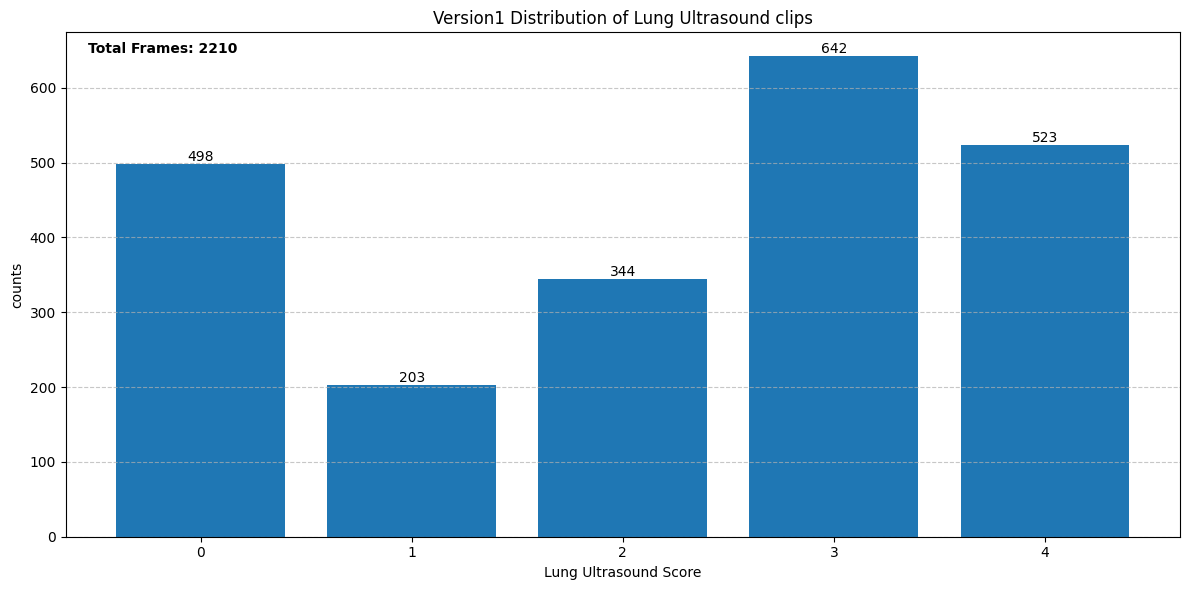

In [104]:
v1_value_counts =  clip_final_v1_df['Lung ultrasound score_lbl'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(v1_value_counts.index, v1_value_counts.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.title('Version1 Distribution of Lung Ultrasound clips')
plt.xlabel('Lung Ultrasound Score')
plt.ylabel('counts')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Total frame 수 계산
total_frames = v1_value_counts.sum()

# Total frame 수를 그래프 왼쪽 위에 표시
plt.text(0.02, 0.98, f'Total Frames: {total_frames}', 
         transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='left',
         fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

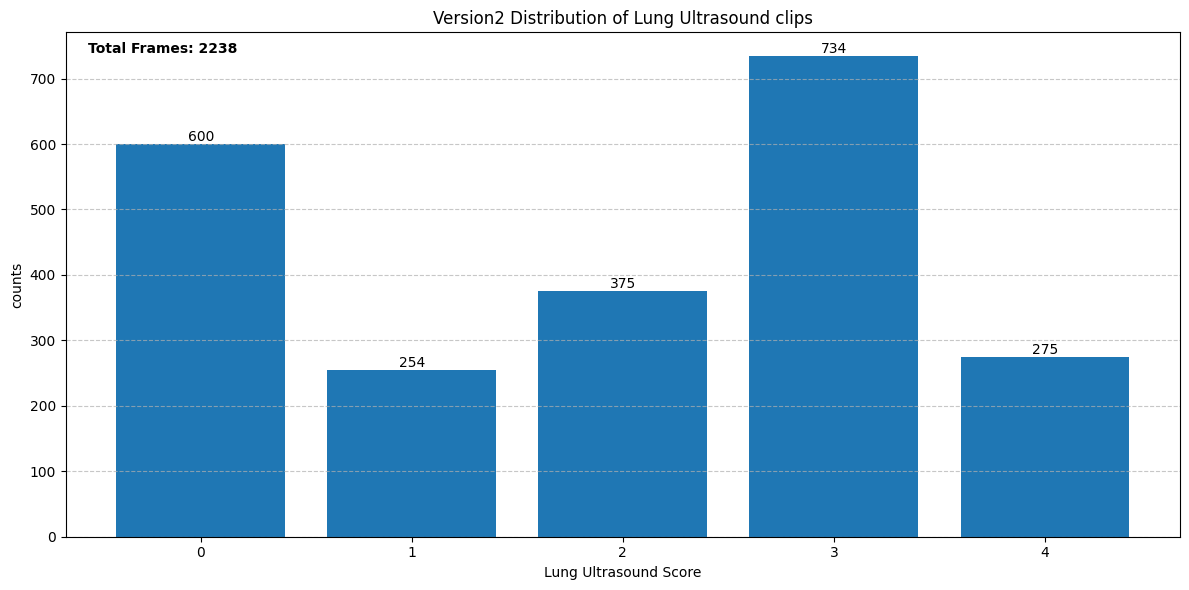

In [105]:
v2_value_counts =  clip_final_v2_df['Lung ultrasound score_lbl'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(v2_value_counts.index, v2_value_counts.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.title('Version2 Distribution of Lung Ultrasound clips')
plt.xlabel('Lung Ultrasound Score')
plt.ylabel('counts')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Total frame 수 계산
total_frames = v2_value_counts.sum()

# Total frame 수를 그래프 왼쪽 위에 표시
plt.text(0.02, 0.98, f'Total Frames: {total_frames}', 
         transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='left',
         fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [106]:
clip_final_v1_df

,256_clip_path,512_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path,Lung ultrasound score_lbl
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,0,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,4
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
...,...,...,...,...,...,...,...,...,...,...,...
2205,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,57786317,57786317_9,0,0,0,1,0,/home/work/LUS/Dataset/processed_dataset_avi/5...,3
2206,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,57786317,57786317_9,0,0,0,1,0,/home/work/LUS/Dataset/processed_dataset_avi/5...,3
2207,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,57786317,57786317_9,0,0,0,1,0,/home/work/LUS/Dataset/processed_dataset_avi/5...,3
2208,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,57786317,57786317_9,0,0,0,1,0,/home/work/LUS/Dataset/processed_dataset_avi/5...,3


In [107]:
print(len(list(set([int(i) for i in class_4_new_v1_df['PatientID']]))))
print(len(list(set([int(i) for i in class_4_new_v1_df['study_id']]))))
print(len(list(set([int(i) for i in clip_final_v1_df['PatientID']]))))
print(len(list(set([int(i) for i in clip_final_v1_df['study_id']]))))

35
341
35
341


In [108]:
print(len(list(set([int(i) for i in class_4_new_v2_df['PatientID']]))))
print(len(list(set([int(i) for i in class_4_new_v2_df['study_id']]))))
print(len(list(set([int(i) for i in clip_final_v2_df['PatientID']]))))
print(len(list(set([int(i) for i in clip_final_v2_df['study_id']]))))

35
345
35
345


## clip multi label classification train / val / test csv 

### 5 artifacts
- A-line / B-line, confluent B-line / Consolidation / Effusion / No findings
- 2d-cnn model을 학습시킨 데이터 셋과 동일하게 split 진행

In [185]:
print(f'5 artifacts counts : {len(clip_final_v1_df)}')
print(f'score 4 counts : {len(clip_final_v1_df[clip_final_v1_df["Lung ultrasound score_lbl"] == 4])}')
print(f'4 artifacts counts : {len(art4_clip_final_v1_df)}')

5 artifacts counts : 2210
score 4 counts : 523
4 artifacts counts : 1687


In [186]:
clip_final_v1_df['total-B-line_lbl'] = ((clip_final_v1_df['B-line_lbl'] == 1) | (clip_final_v1_df['Confluent B-line_lbl'] == 1)).astype(int)
clip_final_v1_df.head()

,256_clip_path,512_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path,Lung ultrasound score_lbl,total-B-line_lbl
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,0,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,4,0
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1


In [187]:
clip_final_v1_df['Lung ultrasound score_lbl'].value_counts()

3    642
4    523
0    498
2    344
1    203
Name: Lung ultrasound score_lbl, dtype: int64

In [190]:
for fold in range(5):
    
    base_path = '/home/work/LUS/Dataset/csv_files/frame_multilabel_classification'

    train_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/train.csv')
    valid_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/valid.csv')
    test_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/test.csv')

    frame_2d_train_df = pd.read_csv(train_csv_path)
    frame_2d_valid_df = pd.read_csv(valid_csv_path)
    frame_2d_test_df = pd.read_csv(test_csv_path)

#     art4_clip_final_v1_df['img_path'] = art4_clip_final_v1_df['img_path'].str.replace('/home/workspace2/LUS', '/home/work/LUS')
#     art4_clip_final_v1_df['img_path'] = art4_clip_final_v1_df['img_path'].str.replace('/home/workspace2/LUS', '/home/work/LUS')
#     art4_clip_final_v1_df['img_path'] = art4_clip_final_v1_df['img_path'].str.replace('/home/workspace2/LUS', '/home/work/LUS')

    train_patient_IDs = list(set(str(int(i)) for i in frame_2d_train_df['PatientID']))
    valid_patient_IDs = list(set(str(int(i)) for i in frame_2d_valid_df['PatientID']))
    test_patient_IDs = list(set(str(int(i)) for i in frame_2d_test_df['PatientID']))

    train_df = clip_final_v1_df[clip_final_v1_df['PatientID'].isin(train_patient_IDs)].reset_index(drop=True)
    valid_df = clip_final_v1_df[clip_final_v1_df['PatientID'].isin(valid_patient_IDs)].reset_index(drop=True)
    test_df = clip_final_v1_df[clip_final_v1_df['PatientID'].isin(test_patient_IDs)].reset_index(drop=True)  

    print(f"total count : {len(train_df)+len(valid_df)+len(test_df)}")
    print(f"total train count : {len(train_df)}")
    print(f"total valid count : {len(valid_df)}")
    print(f"total test count : {len(test_df)}")
    print('#'*30)

    if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}'):
        os.makedirs(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}')
        
    train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/train.csv", index=False)
    valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/valid.csv", index=False)
    test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/test.csv", index=False)  

total count : 2210
total train count : 1378
total valid count : 358
total test count : 474
##############################
total count : 2210
total train count : 1361
total valid count : 375
total test count : 474
##############################
total count : 2210
total train count : 1372
total valid count : 364
total test count : 474
##############################
total count : 2210
total train count : 1400
total valid count : 336
total test count : 474
##############################
total count : 2210
total train count : 1433
total valid count : 303
total test count : 474
##############################


### 4 artifacts
- A-line / B-line, confluent B-line / Consolidation / Effusion
- 2d-cnn model을 학습시킨 데이터 셋과 동일하게 split 진행

#### version 1

In [109]:
class_4_new_v1_df.head()

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,total-B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path
3,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_25,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,NaN
4,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_26,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,NaN
5,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_27,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,NaN
13,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_24,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,NaN
21,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_28,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,NaN


In [110]:
art4_clip_final_v1_df = clip_final_v1_df[clip_final_v1_df['Lung ultrasound score_lbl'] != 4]

In [111]:
print(f'5 artifacts counts : {len(clip_final_v1_df)}')
print(f'score 4 counts : {len(clip_final_v1_df[clip_final_v1_df["Lung ultrasound score_lbl"] == 4])}')
print(f'4 artifacts counts : {len(art4_clip_final_v1_df)}')

5 artifacts counts : 2210
score 4 counts : 523
4 artifacts counts : 1687


In [112]:
art4_clip_final_v1_df['total-B-line_lbl'] = ((art4_clip_final_v1_df['B-line_lbl'] == 1) | (art4_clip_final_v1_df['Confluent B-line_lbl'] == 1)).astype(int)
art4_clip_final_v1_df.head()

/tmp/ipykernel_1623848/3915042062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art4_clip_final_v1_df['total-B-line_lbl'] = ((art4_clip_final_v1_df['B-line_lbl'] == 1) | (art4_clip_final_v1_df['Confluent B-line_lbl'] == 1)).astype(int)


,256_clip_path,512_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path,Lung ultrasound score_lbl,total-B-line_lbl
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1
6,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_4,0,0,0,1,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,3,0


In [208]:
art4_clip_final_v1_df['Lung ultrasound score_lbl'].value_counts()

3    642
0    498
2    344
1    203
Name: Lung ultrasound score_lbl, dtype: int64

In [209]:
for fold in range(5):
    
    base_path = '/home/work/LUS/Dataset/csv_files/frame_multilabel_classification'

    train_csv_path = os.path.join(base_path, f'model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}/train.csv')
    valid_csv_path = os.path.join(base_path, f'model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}/valid.csv')
    test_csv_path = os.path.join(base_path, f'model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}/test.csv')

    frame_2d_train_df = pd.read_csv(train_csv_path)
    frame_2d_valid_df = pd.read_csv(valid_csv_path)
    frame_2d_test_df = pd.read_csv(test_csv_path)

#     art4_clip_final_v1_df['img_path'] = art4_clip_final_v1_df['img_path'].str.replace('/home/workspace2/LUS', '/home/work/LUS')
#     art4_clip_final_v1_df['img_path'] = art4_clip_final_v1_df['img_path'].str.replace('/home/workspace2/LUS', '/home/work/LUS')
#     art4_clip_final_v1_df['img_path'] = art4_clip_final_v1_df['img_path'].str.replace('/home/workspace2/LUS', '/home/work/LUS')

    train_patient_IDs = list(set(str(int(i)) for i in frame_2d_train_df['PatientID']))
    valid_patient_IDs = list(set(str(int(i)) for i in frame_2d_valid_df['PatientID']))
    test_patient_IDs = list(set(str(int(i)) for i in frame_2d_test_df['PatientID']))

    train_df = art4_clip_final_v1_df[art4_clip_final_v1_df['PatientID'].isin(train_patient_IDs)].reset_index(drop=True)
    valid_df = art4_clip_final_v1_df[art4_clip_final_v1_df['PatientID'].isin(valid_patient_IDs)].reset_index(drop=True)
    test_df = art4_clip_final_v1_df[art4_clip_final_v1_df['PatientID'].isin(test_patient_IDs)].reset_index(drop=True)  

    print(f"total count : {len(train_df)+len(valid_df)+len(test_df)}")
    print(f"total train count : {len(train_df)}")
    print(f"total valid count : {len(valid_df)}")
    print(f"total test count : {len(test_df)}")
    print('#'*30)

    if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}'):
        os.makedirs(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}')
        
    train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}/train.csv", index=False)
    valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}/valid.csv", index=False)
    test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}/test.csv", index=False)  

total count : 1687
total train count : 1110
total valid count : 253
total test count : 324
##############################
total count : 1687
total train count : 1075
total valid count : 288
total test count : 324
##############################
total count : 1687
total train count : 1055
total valid count : 308
total test count : 324
##############################
total count : 1687
total train count : 1100
total valid count : 263
total test count : 324
##############################
total count : 1687
total train count : 1112
total valid count : 251
total test count : 324
##############################


In [210]:
art4_clip_final_v1_df['PatientID'][0]
train_patient_IDs[0]

'54670444'

In [211]:
print(len(train_df))
print(len(valid_df))
print(len(test_df))

1112
251
324


#### version 2

In [113]:
class_4_new_v2_df.head()

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,total-B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path
1,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,...,24965778_00002_19,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,NaN
2,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,...,24965778_00002_24,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,NaN
3,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,...,24965778_00002_21,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,NaN
4,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,...,24965778_00002_15,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,NaN
7,24965778,2,20230614,video,NaN,15_33,NaN,NaN,NaN,NaN,...,24965778_00002_17,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,NaN


In [114]:
art4_clip_final_v2_df = clip_final_v2_df[clip_final_v2_df['Lung ultrasound score_lbl'] != 4]

In [115]:
print(f'5 artifacts counts : {len(clip_final_v2_df)}')
print(f'score 4 counts : {len(clip_final_v2_df[clip_final_v2_df["Lung ultrasound score_lbl"] == 4])}')
print(f'4 artifacts counts : {len(art4_clip_final_v2_df)}')

5 artifacts counts : 2238
score 4 counts : 275
4 artifacts counts : 1963


In [116]:
art4_clip_final_v2_df['total-B-line_lbl'] = ((art4_clip_final_v2_df['B-line_lbl'] == 1) | (art4_clip_final_v2_df['Confluent B-line_lbl'] == 1)).astype(int)
art4_clip_final_v2_df.head()

/tmp/ipykernel_1623848/1210630405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art4_clip_final_v2_df['total-B-line_lbl'] = ((art4_clip_final_v2_df['B-line_lbl'] == 1) | (art4_clip_final_v2_df['Confluent B-line_lbl'] == 1)).astype(int)


,256_clip_path,512_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path,Lung ultrasound score_lbl,total-B-line_lbl
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1
6,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_4,0,0,0,1,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,3,0


In [117]:
art4_clip_final_v1_df['Lung ultrasound score_lbl'].value_counts()

3    642
0    498
2    344
1    203
Name: Lung ultrasound score_lbl, dtype: int64

In [118]:
art4_clip_final_v2_df['Lung ultrasound score_lbl'].value_counts()

3    734
0    600
2    375
1    254
Name: Lung ultrasound score_lbl, dtype: int64

In [218]:
for fold in range(5):
    
    base_path = '/home/work/LUS/Dataset/csv_files/frame_multilabel_classification'

    train_csv_path = os.path.join(base_path, f'model_development_set/version_2/4_artifacts/test_0.2/fold_{fold}/train.csv')
    valid_csv_path = os.path.join(base_path, f'model_development_set/version_2/4_artifacts/test_0.2/fold_{fold}/valid.csv')
    test_csv_path = os.path.join(base_path, f'model_development_set/version_2/4_artifacts/test_0.2/fold_{fold}/test.csv')

    frame_2d_train_df = pd.read_csv(train_csv_path)
    frame_2d_valid_df = pd.read_csv(valid_csv_path)
    frame_2d_test_df = pd.read_csv(test_csv_path)

#     art4_clip_final_v1_df['img_path'] = art4_clip_final_v1_df['img_path'].str.replace('/home/workspace2/LUS', '/home/work/LUS')
#     art4_clip_final_v1_df['img_path'] = art4_clip_final_v1_df['img_path'].str.replace('/home/workspace2/LUS', '/home/work/LUS')
#     art4_clip_final_v1_df['img_path'] = art4_clip_final_v1_df['img_path'].str.replace('/home/workspace2/LUS', '/home/work/LUS')

    train_patient_IDs = list(set(str(int(i)) for i in frame_2d_train_df['PatientID']))
    valid_patient_IDs = list(set(str(int(i)) for i in frame_2d_valid_df['PatientID']))
    test_patient_IDs = list(set(str(int(i)) for i in frame_2d_test_df['PatientID']))

    train_df = art4_clip_final_v2_df[art4_clip_final_v2_df['PatientID'].isin(train_patient_IDs)].reset_index(drop=True)
    valid_df = art4_clip_final_v2_df[art4_clip_final_v2_df['PatientID'].isin(valid_patient_IDs)].reset_index(drop=True)
    test_df = art4_clip_final_v2_df[art4_clip_final_v2_df['PatientID'].isin(test_patient_IDs)].reset_index(drop=True)  

    print(f"total count : {len(train_df)+len(valid_df)+len(test_df)}")
    print(f"total train count : {len(train_df)}")
    print(f"total valid count : {len(valid_df)}")
    print(f"total test count : {len(test_df)}")
    print('#'*30)

    if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_2/4_artifacts/test_0.2/fold_{fold}'):
        os.makedirs(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_2/4_artifacts/test_0.2/fold_{fold}')
        
    train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_2/4_artifacts/test_0.2/fold_{fold}/train.csv", index=False)
    valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_2/4_artifacts/test_0.2/fold_{fold}/valid.csv", index=False)
    test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_2/4_artifacts/test_0.2/fold_{fold}/test.csv", index=False) 

total count : 1963
total train count : 1277
total valid count : 304
total test count : 382
##############################
total count : 1963
total train count : 1250
total valid count : 331
total test count : 382
##############################
total count : 1963
total train count : 1219
total valid count : 362
total test count : 382
##############################
total count : 1963
total train count : 1269
total valid count : 312
total test count : 382
##############################
total count : 1963
total train count : 1309
total valid count : 272
total test count : 382
##############################


In [219]:
clip_final_v1_df

,256_clip_path,512_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path,Lung ultrasound score_lbl
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,0,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,4
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
...,...,...,...,...,...,...,...,...,...,...,...
2205,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,57786317,57786317_9,0,0,0,1,0,/home/work/LUS/Dataset/processed_dataset_avi/5...,3
2206,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,57786317,57786317_9,0,0,0,1,0,/home/work/LUS/Dataset/processed_dataset_avi/5...,3
2207,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,57786317,57786317_9,0,0,0,1,0,/home/work/LUS/Dataset/processed_dataset_avi/5...,3
2208,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,57786317,57786317_9,0,0,0,1,0,/home/work/LUS/Dataset/processed_dataset_avi/5...,3


In [220]:
clip_final_v2_df

,256_clip_path,512_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path,Lung ultrasound score_lbl
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,0,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,4
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
...,...,...,...,...,...,...,...,...,...,...,...
2233,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,57786317,57786317_9,0,0,0,1,0,/home/work/LUS/Dataset/processed_dataset_avi/5...,3
2234,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,57786317,57786317_9,0,0,0,1,0,/home/work/LUS/Dataset/processed_dataset_avi/5...,3
2235,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,57786317,57786317_9,0,0,0,1,0,/home/work/LUS/Dataset/processed_dataset_avi/5...,3
2236,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,57786317,57786317_9,0,0,0,1,0,/home/work/LUS/Dataset/processed_dataset_avi/5...,3


# video level과 동일하게 frame-level 5 artifacts csv split

In [148]:
merged_video_v1_df['total-B-line_lbl'] = ((merged_video_v1_df['B-line_lbl'] == 1) | (merged_video_v1_df['Confluent B-line_lbl'] == 1)).astype(int)
merged_video_v1_df.head()

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path,total-B-line_lbl
0,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_1,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...,0
1,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_10,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...,0
2,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_11,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...,0
3,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_25,0,1,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...,1
4,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_26,0,1,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...,1


In [184]:
print(len(merged_video_v1_df))
print(len(merged_video_v1_df[merged_video_v1_df['Lung ultrasound score_lbl'] == 4]))
print(len(merged_video_v1_df[merged_video_v1_df['Lung ultrasound score_lbl'] != 4]))

47849
14307
33542
33542


In [213]:
merged_video_v1_df.head()

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,total-B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path
0,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_1,0,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...
1,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_10,0,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...
2,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_11,0,0,0,0,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,4,/home/work/LUS/Dataset/processed_dataset_avi/2...
3,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_25,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...
4,24965778,2,20230614,video,NaN,24_32,NaN,NaN,NaN,NaN,...,24965778_00002_26,0,1,0,1,0,0,/home/work/LUS/Dataset/dcm_to_png/all_frame/ve...,1,/home/work/LUS/Dataset/processed_dataset_avi/2...


In [152]:
for fold in range(5):
    
    base_path = '/home/work/LUS/Dataset/csv_files/clip_multilabel_classification'

    train_csv_path = os.path.join(base_path, f"model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}/train.csv")
    valid_csv_path = os.path.join(base_path, f"model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}/valid.csv")
    test_csv_path = os.path.join(base_path, f"model_development_set/version_1/4_artifacts/test_0.2/fold_{fold}/test.csv")

    video_4art_train_df = pd.read_csv(train_csv_path)
    video_4art_valid_df = pd.read_csv(valid_csv_path)
    video_4art_test_df = pd.read_csv(test_csv_path)

    train_patient_IDs = list(set(int(i) for i in video_4art_train_df['PatientID']))
    valid_patient_IDs = list(set(int(i) for i in video_4art_valid_df['PatientID']))
    test_patient_IDs = list(set(int(i) for i in video_4art_test_df['PatientID']))

    train_df = merged_video_v1_df[merged_video_v1_df['PatientID'].isin(train_patient_IDs)].reset_index(drop=True)
    valid_df = merged_video_v1_df[merged_video_v1_df['PatientID'].isin(valid_patient_IDs)].reset_index(drop=True)
    test_df = merged_video_v1_df[merged_video_v1_df['PatientID'].isin(test_patient_IDs)].reset_index(drop=True)  

    print(f"total count : {len(train_df)+len(valid_df)+len(test_df)}")
    print(f"total train count : {len(train_df)}")
    print(f"total valid count : {len(valid_df)}")
    print(f"total test count : {len(test_df)}")
    print('#'*30)

    if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}'):
        os.makedirs(f'/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}')
    train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/train.csv", index=False)
    valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/valid.csv", index=False)
    test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/frame_multilabel_classification/model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/test.csv", index=False)
    
    print('-'*50)    

total count : 47849
total train count : 29877
total valid count : 7736
total test count : 10236
##############################
--------------------------------------------------
total count : 47849
total train count : 29489
total valid count : 8124
total test count : 10236
##############################
--------------------------------------------------
total count : 47849
total train count : 29709
total valid count : 7904
total test count : 10236
##############################
--------------------------------------------------
total count : 47849
total train count : 30317
total valid count : 7296
total test count : 10236
##############################
--------------------------------------------------
total count : 47849
total train count : 31060
total valid count : 6553
total test count : 10236
##############################
--------------------------------------------------


# ablation study csv file에 더 긴 clip path 추가

In [219]:
!pwd

/home/work/LUS/code


In [268]:
clip_40_path_lst = glob('/home/work/LUS/Dataset/clip_avi_dataset/256/version_1_40/*.avi')
clip_50_path_lst = glob('/home/work/LUS/Dataset/clip_avi_dataset/256/version_1_50/*.avi')
clip_60_path_lst = glob('/home/work/LUS/Dataset/clip_avi_dataset/256/version_1_60/*.avi')
clip_70_path_lst = glob('/home/work/LUS/Dataset/clip_avi_dataset/256/version_1_70/*.avi')

print(len(clip_40_path_lst))
print(len(clip_50_path_lst))
print(len(clip_60_path_lst))
print(len(clip_70_path_lst))

1573
1275
1275
978


In [269]:
clip_final_v1_df.head()

,256_clip_path,512_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path,Lung ultrasound score_lbl,total-B-line_lbl
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_2,0,0,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,4,0
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,/home/work/LUS/Dataset/clip_avi_dataset/512/ve...,24965778,24965778_3,0,1,0,0,0,/home/work/LUS/Dataset/processed_dataset_avi/2...,1,1


- 각 길이에 맞게 전처리 진행

In [270]:
# 파일 경로에서 patientID 추출
patient_ids = [path.split('/')[-1].split('_')[0] for path in clip_40_path_lst]
study_ids = []
for path in clip_40_path_lst:
    info = path.split('/')[-1].split('.')[0].split('_')
    patient_id = info[0]
    study_id = str(int(info[1]))  
    study_id = f"{patient_id}_{study_id}"
    study_ids.append(study_id)
    
# 데이터프레임 생성
v1_40clip_df = pd.DataFrame({
    '40frame_clip_path': clip_40_path_lst,
#     '60frame_clip_path': clip_60_path_lst,
#     '75frame_clip_path': clip_75_path_lst,
#     '80frame_clip_path': clip_90_path_lst,
    'PatientID': patient_ids,
    'study_id': study_ids
})

v1_40clip_df.head()

,40frame_clip_path,PatientID,study_id
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_2
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_2
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_3
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_3
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_4


In [271]:
# 파일 경로에서 patientID 추출
patient_ids = [path.split('/')[-1].split('_')[0] for path in clip_50_path_lst]
study_ids = []
for path in clip_50_path_lst:
    info = path.split('/')[-1].split('.')[0].split('_')
    patient_id = info[0]
    study_id = str(int(info[1]))  
    study_id = f"{patient_id}_{study_id}"
    study_ids.append(study_id)
    
# 데이터프레임 생성
v1_50clip_df = pd.DataFrame({
    '50frame_clip_path': clip_50_path_lst,
    'PatientID': patient_ids,
    'study_id': study_ids
})

v1_50clip_df.head()

,50frame_clip_path,PatientID,study_id
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_2
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_2
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_3
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_3
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_4


In [272]:
# 파일 경로에서 patientID 추출
patient_ids = [path.split('/')[-1].split('_')[0] for path in clip_60_path_lst]
study_ids = []
for path in clip_60_path_lst:
    info = path.split('/')[-1].split('.')[0].split('_')
    patient_id = info[0]
    study_id = str(int(info[1]))  
    study_id = f"{patient_id}_{study_id}"
    study_ids.append(study_id)
    
# 데이터프레임 생성
v1_60clip_df = pd.DataFrame({
    '60frame_clip_path': clip_60_path_lst,
#     '60frame_clip_path': clip_60_path_lst,
#     '75frame_clip_path': clip_75_path_lst,
#     '80frame_clip_path': clip_90_path_lst,
    'PatientID': patient_ids,
    'study_id': study_ids
})

v1_60clip_df.head()

,60frame_clip_path,PatientID,study_id
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_2
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_2
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_3
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_3
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_4


In [273]:
# 파일 경로에서 patientID 추출
patient_ids = [path.split('/')[-1].split('_')[0] for path in clip_70_path_lst]
study_ids = []
for path in clip_70_path_lst:
    info = path.split('/')[-1].split('.')[0].split('_')
    patient_id = info[0]
    study_id = str(int(info[1]))  
    study_id = f"{patient_id}_{study_id}"
    study_ids.append(study_id)
    
# 데이터프레임 생성
v1_70clip_df = pd.DataFrame({
    '70frame_clip_path': clip_70_path_lst,
    'PatientID': patient_ids,
    'study_id': study_ids
})

v1_70clip_df.head()

,70frame_clip_path,PatientID,study_id
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_2
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_2
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_3
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_3
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_4


In [263]:
# 파일 경로에서 patientID 추출
patient_ids = [path.split('/')[-1].split('_')[0] for path in clip_90_path_lst]
study_ids = []
for path in clip_90_path_lst:
    info = path.split('/')[-1].split('.')[0].split('_')
    patient_id = info[0]
    study_id = str(int(info[1]))  
    study_id = f"{patient_id}_{study_id}"
    study_ids.append(study_id)
    
# 데이터프레임 생성
v1_90clip_df = pd.DataFrame({
    '90frame_clip_path': clip_90_path_lst,
    'PatientID': patient_ids,
    'study_id': study_ids
})

v1_90clip_df.head()

NameError: name 'clip_80_path_lst' is not defined

In [230]:
v1_lbl_dicts

{'A-line_lbl': {'24965778_2': [[0]],
  '24965778_3': [[0]],
  '24965778_4': [[0]],
  '24965778_5': [[0]],
  '24965778_6': [[15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35,
    36,
    37,
    38,
    39,
    40,
    41,
    42,
    43,
    44,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60]],
  '24965778_9': [[0]],
  '30625107_3': [[1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35,
    36,
    37,
    38,
    39,
    40,
    41,
    42,
    43,
    44,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
  

In [274]:
def check_labels_for_avi2(df, lbl_dicts, num_frames):
    # 각 레이블(아티팩트)에 대해 데이터프레임에 열을 추가하고, 초기값을 0으로 설정합니다.
    for lbl_name in lbl_dicts.keys():
        df[lbl_name] = 0
    
    for idx, row in df.iterrows():
        clip_path = row[f'{num_frames}frame_clip_path']
        # 파일명에서 프레임 범위 추출
        _, start_frame, end_frame = clip_path.split('/')[-1].split('.')[0].split('_')[-3:]
        start_frame, end_frame = int(start_frame), int(end_frame)

        study_id = row['study_id']
        
        # 모든 레이블 사전을 순회
        for lbl_name, lbl_dict in lbl_dicts.items():
            
            lbl_ranges = lbl_dict.get(study_id, [])
    
            if lbl_ranges == [[0]]:
                continue
            # 레이블 영역 리스트를 순회하며 현재 avi 파일의 프레임 범위와 겹치는지 확인합니다.
            for lbl_range in lbl_ranges:
                '''
                # 현재 레이블 영역과 avi 파일의 프레임 범위가 겹치는지 확인
                    - 시작 프레임이 레이블 범위 내에 있는 경우
                    - 끝 프레임이 레이블 범위 내에 있는 경우
                    - 레이블 범위가 시작 프레임과 끝 프레임 사이에 완전히 포함되는 경우
                '''
                if (lbl_range[0] <= start_frame <= lbl_range[-1]) or (lbl_range[0] <= end_frame <= lbl_range[-1]) or (start_frame <= lbl_range[0] and end_frame >= lbl_range[-1]):
                    df.at[idx, lbl_name] = 1  # 겹침이 확인되면 해당 레이블 열에 1을 표시합니다.
                    break  # 하나의 영역이라도 겹치면 다음 레이블로 넘어갑니다.
    return df

In [275]:
clip40_final_v1_df = check_labels_for_avi2(v1_40clip_df, v1_lbl_dicts, 40)
clip50_final_v1_df = check_labels_for_avi2(v1_50clip_df, v1_lbl_dicts, 50)
clip60_final_v1_df = check_labels_for_avi2(v1_60clip_df, v1_lbl_dicts, 60)
clip70_final_v1_df = check_labels_for_avi2(v1_70clip_df, v1_lbl_dicts, 70)
# clip90_final_v1_df = check_labels_for_avi2(v1_90clip_df, v1_lbl_dicts, 90)

clip40_final_v1_df['total-B-line_lbl'] = ((clip40_final_v1_df['B-line_lbl'] == 1) | (clip40_final_v1_df['Confluent B-line_lbl'] == 1)).astype(int)
clip50_final_v1_df['total-B-line_lbl'] = ((clip50_final_v1_df['B-line_lbl'] == 1) | (clip50_final_v1_df['Confluent B-line_lbl'] == 1)).astype(int)
clip60_final_v1_df['total-B-line_lbl'] = ((clip60_final_v1_df['B-line_lbl'] == 1) | (clip60_final_v1_df['Confluent B-line_lbl'] == 1)).astype(int)
clip70_final_v1_df['total-B-line_lbl'] = ((clip70_final_v1_df['B-line_lbl'] == 1) | (clip70_final_v1_df['Confluent B-line_lbl'] == 1)).astype(int)
# clip90_final_v1_df['total-B-line_lbl'] = ((clip90_final_v1_df['B-line_lbl'] == 1) | (clip90_final_v1_df['Confluent B-line_lbl'] == 1)).astype(int)

print(len(clip40_final_v1_df))
print(len(clip50_final_v1_df))
print(len(clip60_final_v1_df))
print(len(clip70_final_v1_df))

1573
1275
1275
978


In [279]:
print(len(clip40_final_v1_df))

1573


In [280]:
score_cols = {'A-line_lbl':0, 
              'B-line_lbl':1, 
              'Confluent B-line_lbl':2, 
              'Consolidation_lbl':3, 
              'Pleural effusion_lbl':3}

def assign_LUS_score(row):
    # 각 레이블에 대해 점수 계산
    scores = []
    for label, score in score_cols.items():
        if row[label] > 0:  # 레이블이 존재하는 경우
            scores.append(score)
    # 가장 높은 점수 반환, 레이블이 없는 경우 기본값으로 가장 낮은 점수 할당
    return max(scores) if scores else 4

In [281]:
clip40_final_v1_df['Lung ultrasound score_lbl'] = clip40_final_v1_df.apply(assign_LUS_score, axis=1)
clip50_final_v1_df['Lung ultrasound score_lbl'] = clip50_final_v1_df.apply(assign_LUS_score, axis=1)
clip60_final_v1_df['Lung ultrasound score_lbl'] = clip60_final_v1_df.apply(assign_LUS_score, axis=1)
clip70_final_v1_df['Lung ultrasound score_lbl'] = clip70_final_v1_df.apply(assign_LUS_score, axis=1)

print(len(clip70_final_v1_df))
clip70_final_v1_df.head()

978


,70frame_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,total-B-line_lbl,Lung ultrasound score_lbl
0,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_2,0,1,0,0,0,1,1
1,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_2,0,0,0,0,0,0,4
2,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_3,0,1,0,0,0,1,1
3,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_3,0,0,0,0,0,0,4
4,/home/work/LUS/Dataset/clip_avi_dataset/256/ve...,24965778,24965778_4,0,0,0,1,0,0,3


In [282]:
for fold in range(5):
    
    base_path = '/home/work/LUS/Dataset/csv_files/clip_multilabel_classification'

    train_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/train.csv')
    valid_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/valid.csv')
    test_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/test.csv')

    frame_30_train_df = pd.read_csv(train_csv_path)
    frame_30_valid_df = pd.read_csv(valid_csv_path)
    frame_30_test_df = pd.read_csv(test_csv_path)

    train_patient_IDs = list(set(str(int(i)) for i in frame_30_train_df['PatientID']))
    valid_patient_IDs = list(set(str(int(i)) for i in frame_30_valid_df['PatientID']))
    test_patient_IDs = list(set(str(int(i)) for i in frame_30_test_df['PatientID']))

    train_df = clip40_final_v1_df[clip40_final_v1_df['PatientID'].isin(train_patient_IDs)].reset_index(drop=True)
    valid_df = clip40_final_v1_df[clip40_final_v1_df['PatientID'].isin(valid_patient_IDs)].reset_index(drop=True)
    test_df = clip40_final_v1_df[clip40_final_v1_df['PatientID'].isin(test_patient_IDs)].reset_index(drop=True)  

    print(f"total count : {len(train_df)+len(valid_df)+len(test_df)}")
    print(f"total train count : {len(train_df)}")
    print(f"total valid count : {len(valid_df)}")
    print(f"total test count : {len(test_df)}")
    print('#'*30)

    if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/40_clip/fold_{fold}'):
        os.makedirs(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/40_clip/fold_{fold}')
        
    train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/40_clip/fold_{fold}/train.csv", index=False)
    valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/40_clip/fold_{fold}/valid.csv", index=False)
    test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/40_clip/fold_{fold}/test.csv", index=False)  

total count : 1573
total train count : 983
total valid count : 254
total test count : 336
##############################
total count : 1573
total train count : 970
total valid count : 267
total test count : 336
##############################
total count : 1573
total train count : 977
total valid count : 260
total test count : 336
##############################
total count : 1573
total train count : 997
total valid count : 240
total test count : 336
##############################
total count : 1573
total train count : 1021
total valid count : 216
total test count : 336
##############################


In [283]:
for fold in range(5):
    
    base_path = '/home/work/LUS/Dataset/csv_files/clip_multilabel_classification'

    train_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/train.csv')
    valid_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/valid.csv')
    test_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/test.csv')

    frame_30_train_df = pd.read_csv(train_csv_path)
    frame_30_valid_df = pd.read_csv(valid_csv_path)
    frame_30_test_df = pd.read_csv(test_csv_path)

    train_patient_IDs = list(set(str(int(i)) for i in frame_30_train_df['PatientID']))
    valid_patient_IDs = list(set(str(int(i)) for i in frame_30_valid_df['PatientID']))
    test_patient_IDs = list(set(str(int(i)) for i in frame_30_test_df['PatientID']))

    train_df = clip50_final_v1_df[clip50_final_v1_df['PatientID'].isin(train_patient_IDs)].reset_index(drop=True)
    valid_df = clip50_final_v1_df[clip50_final_v1_df['PatientID'].isin(valid_patient_IDs)].reset_index(drop=True)
    test_df = clip50_final_v1_df[clip50_final_v1_df['PatientID'].isin(test_patient_IDs)].reset_index(drop=True)  

    print(f"total count : {len(train_df)+len(valid_df)+len(test_df)}")
    print(f"total train count : {len(train_df)}")
    print(f"total valid count : {len(valid_df)}")
    print(f"total test count : {len(test_df)}")
    print('#'*30)

    if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/50_clip/fold_{fold}'):
        os.makedirs(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/50_clip/fold_{fold}')
        
    train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/50_clip/fold_{fold}/train.csv", index=False)
    valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/50_clip/fold_{fold}/valid.csv", index=False)
    test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/50_clip/fold_{fold}/test.csv", index=False)  

total count : 1275
total train count : 791
total valid count : 208
total test count : 276
##############################
total count : 1275
total train count : 783
total valid count : 216
total test count : 276
##############################
total count : 1275
total train count : 791
total valid count : 208
total test count : 276
##############################
total count : 1275
total train count : 807
total valid count : 192
total test count : 276
##############################
total count : 1275
total train count : 824
total valid count : 175
total test count : 276
##############################


In [252]:
for fold in range(5):
    
    base_path = '/home/work/LUS/Dataset/csv_files/clip_multilabel_classification'

    train_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/train.csv')
    valid_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/valid.csv')
    test_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/test.csv')

    frame_30_train_df = pd.read_csv(train_csv_path)
    frame_30_valid_df = pd.read_csv(valid_csv_path)
    frame_30_test_df = pd.read_csv(test_csv_path)

    train_patient_IDs = list(set(str(int(i)) for i in frame_30_train_df['PatientID']))
    valid_patient_IDs = list(set(str(int(i)) for i in frame_30_valid_df['PatientID']))
    test_patient_IDs = list(set(str(int(i)) for i in frame_30_test_df['PatientID']))

    train_df = clip60_final_v1_df[clip60_final_v1_df['PatientID'].isin(train_patient_IDs)].reset_index(drop=True)
    valid_df = clip60_final_v1_df[clip60_final_v1_df['PatientID'].isin(valid_patient_IDs)].reset_index(drop=True)
    test_df = clip60_final_v1_df[clip60_final_v1_df['PatientID'].isin(test_patient_IDs)].reset_index(drop=True)  

    print(f"total count : {len(train_df)+len(valid_df)+len(test_df)}")
    print(f"total train count : {len(train_df)}")
    print(f"total valid count : {len(valid_df)}")
    print(f"total test count : {len(test_df)}")
    print('#'*30)

    if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/60_clip/fold_{fold}'):
        os.makedirs(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/60_clip/fold_{fold}')
        
    train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/60_clip/fold_{fold}/train.csv", index=False)
    valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/60_clip/fold_{fold}/valid.csv", index=False)
    test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/60_clip/fold_{fold}/test.csv", index=False)  

total count : 1275
total train count : 791
total valid count : 208
total test count : 276
##############################
total count : 1275
total train count : 783
total valid count : 216
total test count : 276
##############################
total count : 1275
total train count : 791
total valid count : 208
total test count : 276
##############################
total count : 1275
total train count : 807
total valid count : 192
total test count : 276
##############################
total count : 1275
total train count : 824
total valid count : 175
total test count : 276
##############################


In [284]:
for fold in range(5):
    
    base_path = '/home/work/LUS/Dataset/csv_files/clip_multilabel_classification'

    train_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/train.csv')
    valid_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/valid.csv')
    test_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/test.csv')

    frame_30_train_df = pd.read_csv(train_csv_path)
    frame_30_valid_df = pd.read_csv(valid_csv_path)
    frame_30_test_df = pd.read_csv(test_csv_path)

    train_patient_IDs = list(set(str(int(i)) for i in frame_30_train_df['PatientID']))
    valid_patient_IDs = list(set(str(int(i)) for i in frame_30_valid_df['PatientID']))
    test_patient_IDs = list(set(str(int(i)) for i in frame_30_test_df['PatientID']))

    train_df = clip70_final_v1_df[clip70_final_v1_df['PatientID'].isin(train_patient_IDs)].reset_index(drop=True)
    valid_df = clip70_final_v1_df[clip70_final_v1_df['PatientID'].isin(valid_patient_IDs)].reset_index(drop=True)
    test_df = clip70_final_v1_df[clip70_final_v1_df['PatientID'].isin(test_patient_IDs)].reset_index(drop=True)  

    print(f"total count : {len(train_df)+len(valid_df)+len(test_df)}")
    print(f"total train count : {len(train_df)}")
    print(f"total valid count : {len(valid_df)}")
    print(f"total test count : {len(test_df)}")
    print('#'*30)

    if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/70_clip/fold_{fold}'):
        os.makedirs(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/70_clip/fold_{fold}')
        
    train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/70_clip/fold_{fold}/train.csv", index=False)
    valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/70_clip/fold_{fold}/valid.csv", index=False)
    test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/70_clip/fold_{fold}/test.csv", index=False)  

total count : 978
total train count : 600
total valid count : 162
total test count : 216
##############################
total count : 978
total train count : 597
total valid count : 165
total test count : 216
##############################
total count : 978
total train count : 606
total valid count : 156
total test count : 216
##############################
total count : 978
total train count : 618
total valid count : 144
total test count : 216
##############################
total count : 978
total train count : 627
total valid count : 135
total test count : 216
##############################


In [254]:
for fold in range(5):
    
    base_path = '/home/work/LUS/Dataset/csv_files/clip_multilabel_classification'

    train_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/train.csv')
    valid_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/valid.csv')
    test_csv_path = os.path.join(base_path, f'model_development_set/version_1/5_artifacts/test_0.2/fold_{fold}/test.csv')

    frame_30_train_df = pd.read_csv(train_csv_path)
    frame_30_valid_df = pd.read_csv(valid_csv_path)
    frame_30_test_df = pd.read_csv(test_csv_path)

    train_patient_IDs = list(set(str(int(i)) for i in frame_30_train_df['PatientID']))
    valid_patient_IDs = list(set(str(int(i)) for i in frame_30_valid_df['PatientID']))
    test_patient_IDs = list(set(str(int(i)) for i in frame_30_test_df['PatientID']))

    train_df = clip90_final_v1_df[clip90_final_v1_df['PatientID'].isin(train_patient_IDs)].reset_index(drop=True)
    valid_df = clip90_final_v1_df[clip90_final_v1_df['PatientID'].isin(valid_patient_IDs)].reset_index(drop=True)
    test_df = clip90_final_v1_df[clip90_final_v1_df['PatientID'].isin(test_patient_IDs)].reset_index(drop=True)  

    print(f"total count : {len(train_df)+len(valid_df)+len(test_df)}")
    print(f"total train count : {len(train_df)}")
    print(f"total valid count : {len(valid_df)}")
    print(f"total test count : {len(test_df)}")
    print('#'*30)

    if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/90_clip/fold_{fold}'):
        os.makedirs(f'/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/90_clip/fold_{fold}')
        
    train_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/90_clip/fold_{fold}/train.csv", index=False)
    valid_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/90_clip/fold_{fold}/valid.csv", index=False)
    test_df.to_csv(f"/home/work/LUS/Dataset/csv_files/clip_multilabel_classification/model_development_set/version_1/clip_length_ablation_study/90_clip/fold_{fold}/test.csv", index=False)  

total count : 935
total train count : 587
total valid count : 150
total test count : 198
##############################
total count : 935
total train count : 578
total valid count : 159
total test count : 198
##############################
total count : 935
total train count : 581
total valid count : 156
total test count : 198
##############################
total count : 935
total train count : 593
total valid count : 144
total test count : 198
##############################
total count : 935
total train count : 609
total valid count : 128
total test count : 198
##############################
